# TP4 Fréquence de la thématique par décennie - Sofia Valma-Rantisits

In [2]:
import collections
import os
import string
import sys

In [18]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout", 
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "Bruxelles", "bruxelles", "brussel", "Brussel",
      "rue", "Rue", "ville", "voor", "door", "een", "total", "service", "aan", "der"
       "werden", "don", "année", "met", "travaux", "nombre", "die", "totaal", "stad",
       "aantal", "werd", "dienst", "heeft"]
sw = set(sw)

In [20]:
print(f"{len(sw)} stopwords:\n {sorted(sw)}")

223 stopwords:
 ['Brussel', 'Bruxelles', 'Rue', 'aan', 'aantal', 'ai', 'aie', 'aient', 'aies', 'ainsi', 'ait', 'année', 'après', 'as', 'au', 'aura', 'aurai', 'auraient', 'aurais', 'aurait', 'auras', 'aurez', 'auriez', 'aurions', 'aurons', 'auront', 'aussi', 'autre', 'autres', 'aux', 'avaient', 'avais', 'avait', 'avec', 'avez', 'aviez', 'avions', 'avoir', 'avons', 'ayant', 'ayante', 'ayantes', 'ayants', 'ayez', 'ayons', 'bien', 'brussel', 'bruxelles', 'c', 'ce', 'cela', 'celle', 'ces', 'cet', 'cette', 'comme', 'contre', 'd', 'dans', 'de', 'depuis', 'derwerden', 'des', 'deux', 'die', 'dienst', 'dire', 'dit', 'doit', 'don', 'donc', 'dont', 'door', 'du', 'een', 'elle', 'en', 'encore', 'entre', 'es', 'est', 'et', 'eu', 'eue', 'eues', 'eurent', 'eus', 'eusse', 'eussent', 'eusses', 'eussiez', 'eussions', 'eut', 'eux', 'eûmes', 'eût', 'eûtes', 'faire', 'fait', 'faut', 'furent', 'fus', 'fusse', 'fussent', 'fusses', 'fussiez', 'fussions', 'fut', 'fûmes', 'fût', 'fûtes', 'heeft', 'het', 'il', 'il

# Séparer les fichiers de chaque décennie et les nettoyer

## Charger tous les  fichiers de la décennie `1850` et créer un fichier de texts

In [4]:
# Lister les fichiers de bulletins qui correspondent à Bruxelles
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) if f.startswith('Bxl_185')]
txts [:20]

['Bxl_1854_Tome_I1_Part_1.txt',
 'Bxl_1856_Tome_II1_Part_3.txt',
 'Bxl_1857_Tome_I1_Part_5.txt',
 'Bxl_1851_Tome_II1_Part_6.txt',
 'Bxl_1851_Tome_II1_Part_7.txt',
 'Bxl_1856_Tome_II1_Part_6.txt',
 'Bxl_1851_Tome_II1_Part_1.txt',
 'Bxl_1855_Tome_I1_Part_1.txt',
 'Bxl_1850_Tome_I1_Part_4.txt',
 'Bxl_1856_Tome_II1_Part_7.txt',
 'Bxl_1859_Tome_II1_Part_2.txt',
 'Bxl_1852_Tome_I1_Part_5.txt',
 'Bxl_1850_Tome_I1_Part_1.txt',
 'Bxl_1857_Tome_I1_Part_3.txt',
 'Bxl_1857_Tome_II1_Part_2.txt',
 'Bxl_1859_Tome_II1_Part_5.txt',
 'Bxl_1855_Tome_I1_Part_3.txt',
 'Bxl_1855_Tome_II1_Part_2.txt',
 'Bxl_1854_Tome_II1_Part_4.txt',
 'Bxl_1850_Tome_II1_Part_7.txt']

In [5]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [6]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

97

In [7]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][:200]

'VILLE DE\n\nBULLETIN\nANNÉE\n\nP R E M I E R\n\n1854.\n\nS E M E S T R E\n\n\x0c\x0c\x0ch\n\ntombola\nhospice;\nentrées\nh Lay,:\nTixidenji\nà la « I\n\nUsé\n\nlu\n\n\x0cVILLE\n\nDE BRUXELLES.\n\nBULLETIN COMMUNAL\nA N N E E\n\nNUMÉRO\n\n1884.\n\n'

In [37]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp_tp4'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{"1850s"}.txt'), 'w') as f:
    f.write(' '.join(content_list))

In [38]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{"1850s"}.txt'), 'r') as f:
    before = f.read()

before[:500]

"VILLE DE\n\nBULLETIN\nANNÉE\n\nP R E M I E R\n\n1854.\n\nS E M E S T R E\n\n\x0c\x0c\x0ch\n\ntombola\nhospice;\nentrées\nh Lay,:\nTixidenji\nà la « I\n\nUsé\n\nlu\n\n\x0cVILLE\n\nDE BRUXELLES.\n\nBULLETIN COMMUNAL\nA N N E E\n\nNUMÉRO\n\n1884.\n\n1.\n\nMARDI\n\nSéance du 7 Janvier\n\n1 0\n\nJANVIER.\n\n1854.\n\nPrésidence de 3 1 . C H A U L E S D E B R O U C K E R E ,\n\nBourgmestre.\n\n— Communication de pièces adressées au Conseil. — Ouverture d'une\ntombola au profit des pauvres. — Approbation d'actes de l'administration des\nhospices. - Modification au rè"

## Nettoyage du fichier de la decennie

In [30]:
# Lister les Fichiers
data_path = "../data/tmp_tp4/"
files = os.listdir(data_path)

In [31]:
# Choisir le fichier d'une decennie
toclean_file = "../data/tmp_tp4/1850s.txt"
toclean_file

'../data/tmp_tp4/1850s.txt'

In [32]:
text = open(os.path.join(toclean_file), 'r').read()
text[:500]

"VILLE DE\n\nBULLETIN\nANNÉE\n\nP R E M I E R\n\n1854.\n\nS E M E S T R E\n\n\x0c\x0c\x0ch\n\ntombola\nhospice;\nentrées\nh Lay,:\nTixidenji\nà la « I\n\nUsé\n\nlu\n\n\x0cVILLE\n\nDE BRUXELLES.\n\nBULLETIN COMMUNAL\nA N N E E\n\nNUMÉRO\n\n1884.\n\n1.\n\nMARDI\n\nSéance du 7 Janvier\n\n1 0\n\nJANVIER.\n\n1854.\n\nPrésidence de 3 1 . C H A U L E S D E B R O U C K E R E ,\n\nBourgmestre.\n\n— Communication de pièces adressées au Conseil. — Ouverture d'une\ntombola au profit des pauvres. — Approbation d'actes de l'administration des\nhospices. - Modification au rè"

In [33]:
# Préparer la demande de nettoyage (avec les précisions de ce qu'on veut qu'il garde)
def clean_text(toclean_file, folder=None):
    if folder is None:
        input_path = f"1850s.txt"
        output_path = f"1850s_clean.txt"
    else:
        input_path = f"{folder}/1850s.txt"
        output_path = f"{folder}/1850s_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

In [34]:
clean_text(toclean_file, folder=data_path)

'Output has been written in ../data/tmp_tp4//1850s_clean.txt!'

In [35]:
# Vérifier le résultat
with open(os.path.join(data_path, f'1850s_clean.txt'), 'r') as f:
    after = f.read()

after[:500]

'bulletin tombola hospice entrées lay tixidenji usé bulletin communal numéro mardi séance janvier janvier présidence bourgmestre communication pièces adressées conseil ouverture tombola profit pauvres approbation actes administration hospices modification règlement trottoirs concerne entrées cave déclaration utilité publique prolongement lavoir terre neuve rapport section finances indemnité réclamée commune saint josse len inoode cession quartier leopold composition sections transactions procès v'

## Charger tous les  fichiers de la décennie `1860` et créer un fichier de texts

In [40]:
# Lister les fichiers de bulletins qui correspondent à Bruxelles
data_path = '../data'
txt_path = '../data/txt'
txts2 = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) if f.startswith('Bxl_186')]
txts2 [:20]

['Bxl_1861_Tome_II1_Part_5.txt',
 'Bxl_1869_Tome_II1_Part_2.txt',
 'Bxl_1866_Tome_II1_Part_1.txt',
 'Bxl_1865_Tome_I1_Part_1.txt',
 'Bxl_1869_Tome_I2_Part_3.txt',
 'Bxl_1868_Tome_II1_Part_1.txt',
 'Bxl_1867_Tome_II1_Part_1.txt',
 'Bxl_1866_Tome_I1_Part_1.txt',
 'Bxl_1860_Tome_II1_Part_2.txt',
 'Bxl_1860_Tome_II1_Part_6.txt',
 'Bxl_1860_Tome_I1_Part_1.txt',
 'Bxl_1862_Tome_I1_Part_3.txt',
 'Bxl_1862_Tome_I1_Part_4.txt',
 'Bxl_1869_Tome_I1_Part_1.txt',
 'Bxl_1868_Tome_I1_Part_2.txt',
 'Bxl_1868_Tome_II1_Part_6.txt',
 'Bxl_1869_Tome_I1_Part_4.txt',
 'Bxl_1863_Tome_II1_Part_2.txt',
 'Bxl_1866_Tome_I1_Part_4.txt',
 'Bxl_1869_Tome_I1_Part_2.txt']

In [41]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts2:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [42]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

94

In [44]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][:200]

'—\n\nVILLE\n\n31)0\n\nDE\n\n—\n\nBRUXELLES.\n\nBULLETIN COMMUNAL.\nANNÉE\n\nNUMÉRO 3 0 .\n\n1861.\n\nSAMEDI 14 DÉCEMBRE.\n\nCONSEIL COMMUNAL.\nSéance du 14 décembre 1861.\nP r é s i d e n c e de 3 1 . FONTAINAS,\n\nBourgmestr'

In [45]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp_tp4'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{"1860s"}.txt'), 'w') as f:
    f.write(' '.join(content_list))

In [46]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{"1860s"}.txt'), 'r') as f:
    before = f.read()

before[:500]

"—\n\nVILLE\n\n31)0\n\nDE\n\n—\n\nBRUXELLES.\n\nBULLETIN COMMUNAL.\nANNÉE\n\nNUMÉRO 3 0 .\n\n1861.\n\nSAMEDI 14 DÉCEMBRE.\n\nCONSEIL COMMUNAL.\nSéance du 14 décembre 1861.\nP r é s i d e n c e de 3 1 . FONTAINAS,\n\nBourgmestre.\n\nSOMMAIRE. — Décision relative au déplacement du marché aux légumes, établi au\nPont-d'Or, et du marché aux fourrages. — Autorisation donnée au Collège de\nfaire l'acquisition d'un terrain pour l'agrandissement du cimetière de la ville.\n— Rapport fait par M . De Meure, au sujet de la fixation des p"

## Nettoyage du fichier de la decennie

In [36]:
# Lister les Fichiers
data_path = "../data/tmp_tp4/"
files = os.listdir(data_path)

In [37]:
# Choisir le fichier d'une decennie
toclean_file = "../data/tmp_tp4/1860s.txt"
toclean_file

'../data/tmp_tp4/1860s.txt'

In [38]:
text = open(os.path.join(toclean_file), 'r').read()
text[:500]

"—\n\nVILLE\n\n31)0\n\nDE\n\n—\n\nBRUXELLES.\n\nBULLETIN COMMUNAL.\nANNÉE\n\nNUMÉRO 3 0 .\n\n1861.\n\nSAMEDI 14 DÉCEMBRE.\n\nCONSEIL COMMUNAL.\nSéance du 14 décembre 1861.\nP r é s i d e n c e de 3 1 . FONTAINAS,\n\nBourgmestre.\n\nSOMMAIRE. — Décision relative au déplacement du marché aux légumes, établi au\nPont-d'Or, et du marché aux fourrages. — Autorisation donnée au Collège de\nfaire l'acquisition d'un terrain pour l'agrandissement du cimetière de la ville.\n— Rapport fait par M . De Meure, au sujet de la fixation des p"

In [39]:
# Préparer la demande de nettoyage (avec les précisions de ce qu'on veut qu'il garde)
def clean_text(toclean_file, folder=None):
    if folder is None:
        input_path = f"1860s.txt"
        output_path = f"1860s_clean.txt"
    else:
        input_path = f"{folder}/1860s.txt"
        output_path = f"{folder}/1860s_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

In [40]:
clean_text(toclean_file, folder=data_path)

'Output has been written in ../data/tmp_tp4//1860s_clean.txt!'

In [41]:
# Vérifier le résultat
with open(os.path.join(data_path, f'1860s_clean.txt'), 'r') as f:
    after = f.read()

after[:500]

'bulletin communal numéro samedi décembre conseil communal séance décembre fontainas bourgmestre sommaire décision relative déplacement marché légumes établi pont marché fourrages autorisation donnée collège acquisition terrain agrandissement cimetière rapport meure sujet fixation péages canal rupel rapport section publics alignement marché charbons ouverte heures fontainas bourgmestre anspach linden watteeu vandermeeren page ranvvet meure cattoir jacobs cappellemans veldekens depaire tielemans g'

## Charger tous les  fichiers de la décennie `1870` et créer un fichier de texts

In [47]:
# Lister les fichiers de bulletins qui correspondent à Bruxelles
data_path = '../data'
txt_path = '../data/txt'
txts3 = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) if f.startswith('Bxl_187')]
txts3 [:20]

['Bxl_1871_Tome_I1_Part_3.txt',
 'Bxl_1877_Tome_II1_Part_6.txt',
 'Bxl_1879_Tome_II1_Part_1.txt',
 'Bxl_1871_Tome_II1_Part_1.txt',
 'Bxl_1870_Tome_I1_Part_1.txt',
 'Bxl_1876_Tome_I1_Part_1.txt',
 'Bxl_1870_Tome_I1_Part_2.txt',
 'Bxl_1878_Tome_II1_Part_1.txt',
 'Bxl_1871_Tome_I1_Part_2.txt',
 'Bxl_1878_Tome_II1_Part_3.txt',
 'Bxl_1876_Tome_I1_Part_4.txt',
 'Bxl_1879_Tome_II1_Part_9.txt',
 'Bxl_1870_Tome_II1_Part_4.txt',
 'Bxl_1872_Tome_II1_Part_3.txt',
 'Bxl_1878_Tome_II1_Part_5.txt',
 'Bxl_1871_Tome_I1_Part_1.txt',
 'Bxl_1870_Tome_II1_Part_6.txt',
 'Bxl_1871_Tome_II1_Part_6.txt',
 'Bxl_1877_Tome_II1_Part_7.txt',
 'Bxl_1876_Tome_II1_Part_5.txt']

In [48]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts3:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [49]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

95

In [50]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][:200]

'—\n\nVILLE\n\nD E\n\nBULLETIN\n\n201 —\n\nB R U X E L L E S .\n\nCOMMUNAL.\n\nANNÉE\n\n1871.\n\nN U M É R O 4.\n\nLUNDI 17\n\nCONSEIL\n\nAVRIL.\n\nCOMMUNAL.\n\nCOMITÉ SECRET DU 6 MARS 1 8 7 1 .\n\nLe Conseil a nommé M . Emile Lhoe'

In [51]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp_tp4'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{"1870s"}.txt'), 'w') as f:
    f.write(' '.join(content_list))

In [52]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{"1870s"}.txt'), 'r') as f:
    before = f.read()

before[:500]

"—\n\nVILLE\n\nD E\n\nBULLETIN\n\n201 —\n\nB R U X E L L E S .\n\nCOMMUNAL.\n\nANNÉE\n\n1871.\n\nN U M É R O 4.\n\nLUNDI 17\n\nCONSEIL\n\nAVRIL.\n\nCOMMUNAL.\n\nCOMITÉ SECRET DU 6 MARS 1 8 7 1 .\n\nLe Conseil a nommé M . Emile Lhoest sténographe de la Ville.\nIl a délégué M . l'Echevin Couteaux pour représenter la Ville auprès de\nla Société royale de Zoologie.\nIl a nommé administrateurs des Hospices et de la Bienfaisance :\nM M . Charles Thiéfry et Jean de Bongé.\nIl a adopté les modifications proposées au règlement organique du"

## Nettoyage du fichier de la decennie

In [24]:
# Lister les Fichiers
data_path = "../data/tmp_tp4/"
files = os.listdir(data_path)

In [25]:
# Choisir le fichier d'une decennie
toclean_file = "../data/tmp_tp4/1870s.txt"
toclean_file

'../data/tmp_tp4/1870s.txt'

In [26]:
text = open(os.path.join(toclean_file), 'r').read()
text[:500]

"—\n\nVILLE\n\nD E\n\nBULLETIN\n\n201 —\n\nB R U X E L L E S .\n\nCOMMUNAL.\n\nANNÉE\n\n1871.\n\nN U M É R O 4.\n\nLUNDI 17\n\nCONSEIL\n\nAVRIL.\n\nCOMMUNAL.\n\nCOMITÉ SECRET DU 6 MARS 1 8 7 1 .\n\nLe Conseil a nommé M . Emile Lhoest sténographe de la Ville.\nIl a délégué M . l'Echevin Couteaux pour représenter la Ville auprès de\nla Société royale de Zoologie.\nIl a nommé administrateurs des Hospices et de la Bienfaisance :\nM M . Charles Thiéfry et Jean de Bongé.\nIl a adopté les modifications proposées au règlement organique du"

In [27]:
# Préparer la demande de nettoyage (avec les précisions de ce qu'on veut qu'il garde)
def clean_text(toclean_file, folder=None):
    if folder is None:
        input_path = f"1870s.txt"
        output_path = f"1870s_clean.txt"
    else:
        input_path = f"{folder}/1870s.txt"
        output_path = f"{folder}/1870s_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

In [28]:
clean_text(toclean_file, folder=data_path)

'Output has been written in ../data/tmp_tp4//1870s_clean.txt!'

In [29]:
# Vérifier le résultat
with open(os.path.join(data_path, f'1870s_clean.txt'), 'r') as f:
    after = f.read()

after[:500]

'bulletin communal lundi conseil avril communal comité secret mars conseil nommé emile lhoest sténographe délégué echevin couteaux représenter auprès société royale zoologie nommé administrateurs hospices bienfaisance charles thiéfry jean bongé adopté modifications proposées règlement organique corps sapeurs pompiers approuvé principe proposition faite rachat baraques lazaret plaine manœuvres prix pain bourgmestre informe public résulte rapports officiers police pain ménage vend cent kil chez cen'

## Charger tous les  fichiers de la décennie `1880` et créer un fichier de texts

In [53]:
# Lister les fichiers de bulletins qui correspondent à Bruxelles
data_path = '../data'
txt_path = '../data/txt'
txts4 = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) if f.startswith('Bxl_188')]
txts4 [:20]

['Bxl_1882_Tome_I2_Part_12.txt',
 'Bxl_1889_Tome_I2_Part_3.txt',
 'Bxl_1880_Tome_I1_Part_8.txt',
 'Bxl_1881_Tome_I2_Part_9.txt',
 'Bxl_1883_Tome_I1_Part_6.txt',
 'Bxl_1885_Tome_I2_Part_4.txt',
 'Bxl_1881_Tome_I2_Part_11.txt',
 'Bxl_1885_Tome_I2_Part_12.txt',
 'Bxl_1885_Tome_I1_Part_3.txt',
 'Bxl_1887_Tome_I1_Part_6.txt',
 'Bxl_1883_Tome_I2_Part_7.txt',
 'Bxl_1886_Tome_I1_Part_6.txt',
 'Bxl_1886_Tome_I2_Part_6.txt',
 'Bxl_1886_Tome_I2_Part_1.txt',
 'Bxl_1889_Tome_I1_Part_2.txt',
 'Bxl_1882_Tome_I1_Part_1.txt',
 'Bxl_1882_Tome_I2_Part_5.txt',
 'Bxl_1889_Tome_I2_Part_4.txt',
 'Bxl_1881_Tome_I1_Part_4.txt',
 'Bxl_1881_Tome_I1_Part_8.txt']

In [54]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts4:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [55]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

190

In [56]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][:200]

'Art. 74. — Subside à VAthénée royal : 82,000 francs.\nCette somme représente la part incombant à ia Ville dans\nle traitement des professeurs, ainsi que le montant des\nmenues dépenses.\nLe budget présent'

In [57]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp_tp4'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{"1880s"}.txt'), 'w') as f:
    f.write(' '.join(content_list))

In [58]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{"1880s"}.txt'), 'r') as f:
    before = f.read()

before[:500]

"Art. 74. — Subside à VAthénée royal : 82,000 francs.\nCette somme représente la part incombant à ia Ville dans\nle traitement des professeurs, ainsi que le montant des\nmenues dépenses.\nLe budget présenté par la Commission administrative\nainsi que le compte justifiant l'emploi de ces fonds, sont\nannuellement soumis à l'approbation du Conseil communal.\nArt. 75. — loyer de locaux, entretien, contributions et assurance :\n29,750 francs.\nLoyer des locaux de la section professionnelle de 1 Athénée, rue d"

## Nettoyage du fichier de la decennie

In [48]:
# Lister les Fichiers
data_path = "../data/tmp_tp4/"
files = os.listdir(data_path)

In [49]:
# Choisir le fichier d'une decennie
toclean_file = "../data/tmp_tp4/1880s.txt"
toclean_file

'../data/tmp_tp4/1880s.txt'

In [50]:
text = open(os.path.join(toclean_file), 'r').read()
text[:500]

"Art. 74. — Subside à VAthénée royal : 82,000 francs.\nCette somme représente la part incombant à ia Ville dans\nle traitement des professeurs, ainsi que le montant des\nmenues dépenses.\nLe budget présenté par la Commission administrative\nainsi que le compte justifiant l'emploi de ces fonds, sont\nannuellement soumis à l'approbation du Conseil communal.\nArt. 75. — loyer de locaux, entretien, contributions et assurance :\n29,750 francs.\nLoyer des locaux de la section professionnelle de 1 Athénée, rue d"

In [51]:
# Préparer la demande de nettoyage (avec les précisions de ce qu'on veut qu'il garde)
def clean_text(toclean_file, folder=None):
    if folder is None:
        input_path = f"1880s.txt"
        output_path = f"1880s_clean.txt"
    else:
        input_path = f"{folder}/1880s.txt"
        output_path = f"{folder}/1880s_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

In [52]:
clean_text(toclean_file, folder=data_path)

'Output has been written in ../data/tmp_tp4//1880s_clean.txt!'

In [53]:
# Vérifier le résultat
with open(os.path.join(data_path, f'1880s_clean.txt'), 'r') as f:
    after = f.read()

after[:500]

'art subside vathénée royal francs somme représente part incombant traitement professeurs montant menues dépenses budget présenté commission administrative compte justifiant emploi fonds annuellement soumis approbation conseil communal art loyer locaux entretien contributions assurance francs loyer locaux section professionnelle athénée grand hospice contributions assurance loyer maison grands carmes loyer caves grands carmes contributions entretien bâtiments grand hospice entretien chêne grands '

## Charger tous les  fichiers de la décennie `1890` et créer un fichier de texts

In [59]:
# Lister les fichiers de bulletins qui correspondent à Bruxelles
data_path = '../data'
txt_path = '../data/txt'
txts5 = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) if f.startswith('Bxl_189')]
txts5 [:20]

['Bxl_1891_Tome_I1_Part_1.txt',
 'Bxl_1896_Tome_I2_1_Part_1.txt',
 'Bxl_1899_Tome_I1_Part_3.txt',
 'Bxl_1891_Tome_I1_Part_6.txt',
 'Bxl_1890_Tome_I2_Part_4.txt',
 'Bxl_1896_Tome_I1_2_Part_5.txt',
 'Bxl_1891_Tome_I1_Part_5.txt',
 'Bxl_1898_Tome_I1_Part_12.txt',
 'Bxl_1891_Tome_I2_Part_4.txt',
 'Bxl_1892_Tome_I2_Part_1.txt',
 'Bxl_1895_Tome_I1_Part_1.txt',
 'Bxl_1899_Tome_I2_Part_12.txt',
 'Bxl_1896_Tome_I1_2_Part_6.txt',
 'Bxl_1898_Tome_I1_Part_3.txt',
 'Bxl_1892_Tome_I2_Part_8.txt',
 'Bxl_1890_Tome_I1_Part_3.txt',
 'Bxl_1892_Tome_I1_Part_6.txt',
 'Bxl_1893_Tome_I1_Part_7.txt',
 'Bxl_1894_Tome_I1_Part_4.txt',
 'Bxl_1890_Tome_I1_Part_8.txt']

In [60]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts5:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [61]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

200

In [62]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][:200]

'VILLE\n\nDE\n\nJLLETIN\n\nBRUXELLES.\n\nCOMMUNAL\n\nANNÉE\n\nPREMIERE\n\n1891.\n\nPARTIE.\n\nTOME I .\n\nCOMPTE\n\nRENDU\n\nDES\n\nSÉANCES.\n\nBRUXELLES,\n1MPR1MEH1E D E V\n\nV E\n\nJULIEN\n\nBAE&TSOE, S U C .\n\n1891\n\nDE\n\nBOLS-WITTOUCK.'

In [63]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp_tp4'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{"1890s"}.txt'), 'w') as f:
    f.write(' '.join(content_list))

In [64]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{"1890s"}.txt'), 'r') as f:
    before = f.read()

before[:500]

'VILLE\n\nDE\n\nJLLETIN\n\nBRUXELLES.\n\nCOMMUNAL\n\nANNÉE\n\nPREMIERE\n\n1891.\n\nPARTIE.\n\nTOME I .\n\nCOMPTE\n\nRENDU\n\nDES\n\nSÉANCES.\n\nBRUXELLES,\n1MPR1MEH1E D E V\n\nV E\n\nJULIEN\n\nBAE&TSOE, S U C .\n\n1891\n\nDE\n\nBOLS-WITTOUCK.\n\n\x0c\x0cN°\n\n1.\n\nCOMPTE R E N D U D E L A S É A N C E\n\nD U 1" J A N V I E R\n\n4891.\n\nVILLE DE B R U X E L L E S .\n\nBULLETIN\n\nCOMMUNAL\n\nA N N É E\n\nCONSEIL\n\nCOMMUNAL.\n\nSéance du 1\nPrésidence\n\n1891.\n\ne r\n\nJanvier 1 8 9 1 .\n\nde M . B U L S ,\n\nBourgmestre.\n\nSOMMAIEB :\n\n1.\n2.\n3.\n4.\n5.\n\nPrestation de serment des'

## Nettoyage du fichier de la decennie

In [65]:
# Lister les Fichiers
data_path = "../data/tmp_tp4/"
files = os.listdir(data_path)

In [66]:
# Choisir le fichier d'une decennie
toclean_file = "../data/tmp_tp4/1890s.txt"
toclean_file

'../data/tmp_tp4/1890s.txt'

In [67]:
text = open(os.path.join(toclean_file), 'r').read()
text[:500]

'VILLE\n\nDE\n\nJLLETIN\n\nBRUXELLES.\n\nCOMMUNAL\n\nANNÉE\n\nPREMIERE\n\n1891.\n\nPARTIE.\n\nTOME I .\n\nCOMPTE\n\nRENDU\n\nDES\n\nSÉANCES.\n\nBRUXELLES,\n1MPR1MEH1E D E V\n\nV E\n\nJULIEN\n\nBAE&TSOE, S U C .\n\n1891\n\nDE\n\nBOLS-WITTOUCK.\n\n\x0c\x0cN°\n\n1.\n\nCOMPTE R E N D U D E L A S É A N C E\n\nD U 1" J A N V I E R\n\n4891.\n\nVILLE DE B R U X E L L E S .\n\nBULLETIN\n\nCOMMUNAL\n\nA N N É E\n\nCONSEIL\n\nCOMMUNAL.\n\nSéance du 1\nPrésidence\n\n1891.\n\ne r\n\nJanvier 1 8 9 1 .\n\nde M . B U L S ,\n\nBourgmestre.\n\nSOMMAIEB :\n\n1.\n2.\n3.\n4.\n5.\n\nPrestation de serment des'

In [68]:
# Préparer la demande de nettoyage (avec les précisions de ce qu'on veut qu'il garde)
def clean_text(toclean_file, folder=None):
    if folder is None:
        input_path = f"1890s.txt"
        output_path = f"1890s_clean.txt"
    else:
        input_path = f"{folder}/1890s.txt"
        output_path = f"{folder}/1890s_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

In [69]:
clean_text(toclean_file, folder=data_path)

'Output has been written in ../data/tmp_tp4//1890s_clean.txt!'

In [70]:
# Vérifier le résultat
with open(os.path.join(data_path, f'1890s_clean.txt'), 'r') as f:
    after = f.read()

after[:500]

'jlletin communal premiere partie tome compte rendu séances julien bae tsoe bols wittouck compte bulletin communal conseil communal séance présidence janvier bourgmestre sommaieb prestation serment conseillers élus octobre élection échevins prestation serment sections conseil composition installations maritimes motion martiny chauffoirs publics proposition séance ouverte dix heures demie buis bourgmestre walravens becquet janssen echevins godefroy depaire gheude doucet yseux richald potter kops s'

## Charger tous les  fichiers de la décennie `1900` et créer un fichier de texts

In [71]:
# Lister les fichiers de bulletins qui correspondent à Bruxelles
data_path = '../data'
txt_path = '../data/txt'
txts6 = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) if f.startswith('Bxl_190')]
txts6 [:20]

['Bxl_1909_Tome_I2_1_Part_5.txt',
 'Bxl_1903_Tome_I2_2_Part_2.txt',
 'Bxl_1904_Tome_I2_Part_1.txt',
 'Bxl_1900_Tome_I2_Part_8.txt',
 'Bxl_1906_Tome_II1_Part_1.txt',
 'Bxl_1903_Tome_I2_1_Part_9.txt',
 'Bxl_1904_Tome_I2_Part_17.txt',
 'Bxl_1904_Tome_I2_Part_2.txt',
 'Bxl_1902_Tome_I2_2_Part_8.txt',
 'Bxl_1900_Tome_I2_Part_3.txt',
 'Bxl_1903_Tome_I1_Part_3.txt',
 'Bxl_1902_Tome_I1_Part_6.txt',
 'Bxl_1906_Tome_I1_Part_13.txt',
 'Bxl_1902_Tome_I2_2_Part_5.txt',
 'Bxl_1905_Tome_I2_Part_13.txt',
 'Bxl_1908_Tome_I1_Part_1.txt',
 'Bxl_1902_Tome_I1_Part_5.txt',
 'Bxl_1907_Tome_II1_Part_1.txt',
 'Bxl_1902_Tome_II1_Part_2.txt',
 'Bxl_1909_Tome_I2_2_Part_3.txt']

In [72]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts6:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [73]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

223

In [74]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][:200]

"Produit du droit de fréquent\nPUBLICS\n\n142\n\n4869\n\nP u p i t r e s de l i q u i d a t i o n\n\n»\n\nNOMBF\n\ndes\nredevances\n\nNombre\n\nMONTANT\nTOTAL\n\nde porteurs\nde dépêches\n\nde\ndélégués\n\nd'agents\nde change\n\n18"

In [75]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp_tp4'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{"1900s"}.txt'), 'w') as f:
    f.write(' '.join(content_list))

In [76]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{"1900s"}.txt'), 'r') as f:
    before = f.read()

before[:500]

'Produit du droit de fréquent\nPUBLICS\n\n142\n\n4869\n\nP u p i t r e s de l i q u i d a t i o n\n\n»\n\nNOMBF\n\ndes\nredevances\n\nNombre\n\nMONTANT\nTOTAL\n\nde porteurs\nde dépêches\n\nde\ndélégués\n\nd\'agents\nde change\n\n1868\n\nB O U R S E At\n\nC ai\nC "\n\nMONTANT\n\nsg\na S\n\nd\'entrées\n?n m o y e n n e\n(par jour)\n\nD E SFONDS\n\nNOMBRE\nde\nbanquiers\n\nANNÉES\n\nBOURSE\n\n142\n\n5,600\n\n»\n\n428\n\n128\n\n6,400\n\n»\n\n>\n\n*\n\n4870\n\n445\n\n445\n\n7,250\n\n»\n\n•\n\n»\n\n»\n\n4874\n\n4 66\n\n466\n\n8,300\n\n»\n\n»\n\nS\n\n»\n\n»\n\n202\n\n40,400\n\n»\n\n>\n\n>\n\n»\n\n»\n\n245\n\n55,350\n\n>•\n\n370\n\n'

## Nettoyage du fichier de la decennie

In [77]:
# Lister les Fichiers
data_path = "../data/tmp_tp4/"
files = os.listdir(data_path)

In [78]:
# Choisir le fichier d'une decennie
toclean_file = "../data/tmp_tp4/1900s.txt"
toclean_file

'../data/tmp_tp4/1900s.txt'

In [79]:
text = open(os.path.join(toclean_file), 'r').read()
text[:500]

'Produit du droit de fréquent\nPUBLICS\n\n142\n\n4869\n\nP u p i t r e s de l i q u i d a t i o n\n\n»\n\nNOMBF\n\ndes\nredevances\n\nNombre\n\nMONTANT\nTOTAL\n\nde porteurs\nde dépêches\n\nde\ndélégués\n\nd\'agents\nde change\n\n1868\n\nB O U R S E At\n\nC ai\nC "\n\nMONTANT\n\nsg\na S\n\nd\'entrées\n?n m o y e n n e\n(par jour)\n\nD E SFONDS\n\nNOMBRE\nde\nbanquiers\n\nANNÉES\n\nBOURSE\n\n142\n\n5,600\n\n»\n\n428\n\n128\n\n6,400\n\n»\n\n>\n\n*\n\n4870\n\n445\n\n445\n\n7,250\n\n»\n\n•\n\n»\n\n»\n\n4874\n\n4 66\n\n466\n\n8,300\n\n»\n\n»\n\nS\n\n»\n\n»\n\n202\n\n40,400\n\n»\n\n>\n\n>\n\n»\n\n»\n\n245\n\n55,350\n\n>•\n\n370\n\n'

In [80]:
# Préparer la demande de nettoyage (avec les précisions de ce qu'on veut qu'il garde)
def clean_text(toclean_file, folder=None):
    if folder is None:
        input_path = f"1900s.txt"
        output_path = f"1900s_clean.txt"
    else:
        input_path = f"{folder}/1900s.txt"
        output_path = f"{folder}/1900s_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

In [81]:
clean_text(toclean_file, folder=data_path)

'Output has been written in ../data/tmp_tp4//1900s_clean.txt!'

In [82]:
# Vérifier le résultat
with open(os.path.join(data_path, f'1900s_clean.txt'), 'r') as f:
    after = f.read()

after[:500]

'produit droit fréquent publics nombf redevances montant porteurs dépêches délégués agents change montant entrées jour sfonds banquiers années bourse bourse observations taxe francs agents change courtiers commissionnaires fonds publics inauguration bourse commerce taxe fixée agents change taxe loofr établie personnesfréquentantla salledes banquiers lilli droit fréquentation bourse agents change réduit francs redevance francs fixée location pupitres liquidation droit fréquentation porte francs ag'

## Charger tous les  fichiers de la décennie `1910` et créer un fichier de texts

In [83]:
# Lister les fichiers de bulletins qui correspondent à Bruxelles
data_path = '../data'
txt_path = '../data/txt'
txts7 = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) if f.startswith('Bxl_191')]
txts7 [:20]

['Bxl_1910_Tome_I1_Part_2.txt',
 'Bxl_1911_Tome_I2_2_Part_9.txt',
 'Bxl_1910_Tome_I1_Part_1.txt',
 'Bxl_1911_Tome_I2_1_Part_5.txt',
 'Bxl_1910_Tome_I2_1_Part_12.txt',
 'Bxl_1919_Tome_I2_2_Part_5.txt',
 'Bxl_1910_Tome_I2_1_Part_5.txt',
 'Bxl_1911_Tome_I2_2_Part_11.txt',
 'Bxl_1912_Tome_I2_1_Part_7.txt',
 'Bxl_1913_Tome_I2_2_Part_1.txt',
 'Bxl_1911_Tome_I2_1_Part_10.txt',
 'Bxl_1915_Tome_II1_Part_3.txt',
 'Bxl_1912_Tome_I1_2_Part_7.txt',
 'Bxl_1913_Tome_I2_1_Part_7.txt',
 'Bxl_1911_Tome_I1_Part_2.txt',
 'Bxl_1910_Tome_I2_1_Part_4.txt',
 'Bxl_1919_Tome_I2_2_Part_3.txt',
 'Bxl_1913_Tome_I2_2_Part_7.txt',
 'Bxl_1911_Tome_I1_Part_10.txt',
 'Bxl_1912_Tome_I2_2_Part_5.txt']

In [84]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts7:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [85]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

170

In [86]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][:200]

"(31\n\nJanvier\n\n1910)\n\n—\n\n100\n\n—\n\nCes comptes soldent par un déficit de. . . fr.\nalors que la somme prévue au bu iget de la Ville\nn'est que de\nDifférence.\n\n626.568 90\n532,970 37\n\n. fr.\n\n93,598 53\n\nEn vu"

In [87]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp_tp4'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{"1910s"}.txt'), 'w') as f:
    f.write(' '.join(content_list))

In [88]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{"1910s"}.txt'), 'r') as f:
    before = f.read()

before[:500]

"(31\n\nJanvier\n\n1910)\n\n—\n\n100\n\n—\n\nCes comptes soldent par un déficit de. . . fr.\nalors que la somme prévue au bu iget de la Ville\nn'est que de\nDifférence.\n\n626.568 90\n532,970 37\n\n. fr.\n\n93,598 53\n\nEn vue de permettre de liquider le montant de ce déficit, le\nCollège vous propose, Messieurs, le vote d'un crédit supplémentaire defr. 9;5,598-ô3 à l'art. 131 des dépenses ordinaires\ndu budget de 1901) : « Subside éventuel à\nl'Administration\ndes hospices et secours ».\n\nLes ressources ordinaires de l'exer"

## Nettoyage du fichier de la decennie

In [89]:
# Lister les Fichiers
data_path = "../data/tmp_tp4/"
files = os.listdir(data_path)

In [90]:
# Choisir le fichier d'une decennie
toclean_file = "../data/tmp_tp4/1910s.txt"
toclean_file

'../data/tmp_tp4/1910s.txt'

In [91]:
text = open(os.path.join(toclean_file), 'r').read()
text[:500]

"(31\n\nJanvier\n\n1910)\n\n—\n\n100\n\n—\n\nCes comptes soldent par un déficit de. . . fr.\nalors que la somme prévue au bu iget de la Ville\nn'est que de\nDifférence.\n\n626.568 90\n532,970 37\n\n. fr.\n\n93,598 53\n\nEn vue de permettre de liquider le montant de ce déficit, le\nCollège vous propose, Messieurs, le vote d'un crédit supplémentaire defr. 9;5,598-ô3 à l'art. 131 des dépenses ordinaires\ndu budget de 1901) : « Subside éventuel à\nl'Administration\ndes hospices et secours ».\n\nLes ressources ordinaires de l'exer"

In [92]:
# Préparer la demande de nettoyage (avec les précisions de ce qu'on veut qu'il garde)
def clean_text(toclean_file, folder=None):
    if folder is None:
        input_path = f"1910s.txt"
        output_path = f"1910s_clean.txt"
    else:
        input_path = f"{folder}/1910s.txt"
        output_path = f"{folder}/1910s_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

In [93]:
clean_text(toclean_file, folder=data_path)

'Output has been written in ../data/tmp_tp4//1910s_clean.txt!'

In [94]:
# Vérifier le résultat
with open(os.path.join(data_path, f'1910s_clean.txt'), 'r') as f:
    after = f.read()

after[:500]

'janvier comptes soldent déficit alors somme prévue iget différence vue permettre liquider montant déficit collège propose messieurs vote crédit supplémentaire defr art dépenses ordinaires budget subside éventuel administration hospices secours ressources ordinaires exercice couvriront dépense section finances émis avis favorable crédit extraordinaire emprunt échanger décembre exercice obligations définitives restant titres provisoires date conformité art convention octobre substituée porteurs ti'

## Charger tous les  fichiers de la décennie `1920` et créer un fichier de texts

In [95]:
# Lister les fichiers de bulletins qui correspondent à Bruxelles
data_path = '../data'
txt_path = '../data/txt'
txts8 = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) if f.startswith('Bxl_192')]
txts8 [:20]

['Bxl_1929_Tome_I_Part_9.txt',
 'Bxl_1925_Tome_II1_1_Part_6.txt',
 'Bxl_1920_Tome_I2_Part_4.txt',
 'Bxl_1925_Tome_II1_1_Part_5.txt',
 'Bxl_1926_Tome_I1_Part_2.txt',
 'Bxl_1920_Tome_I2_Part_16.txt',
 'Bxl_1925_Tome_II1_1_Part_7.txt',
 'Bxl_1928_Tome_II1_Part_6.txt',
 'Bxl_1926_Tome_II1_Part_10.txt',
 'Bxl_1925_Tome_II1_2_Part_2.txt',
 'Bxl_1928_Tome_II1_Part_12.txt',
 'Bxl_1926_Tome_I2_Part_8.txt',
 'Bxl_1927_Tome_I_Part_5.txt',
 'Bxl_1929_Tome_I_Part_4.txt',
 'Bxl_1924_Tome_I1_Part_7.txt',
 'Bxl_1926_Tome_I2_Part_6.txt',
 'Bxl_1923_Tome_I1_Part_5.txt',
 'Bxl_1928_Tome_II1_Part_2.txt',
 'Bxl_1929_Tome_II2_Part_2.txt',
 'Bxl_1926_Tome_I1_Part_8.txt']

In [96]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [97]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

97

In [98]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][:200]

'VILLE DE\n\nBULLETIN\nANNÉE\n\nP R E M I E R\n\n1854.\n\nS E M E S T R E\n\n\x0c\x0c\x0ch\n\ntombola\nhospice;\nentrées\nh Lay,:\nTixidenji\nà la « I\n\nUsé\n\nlu\n\n\x0cVILLE\n\nDE BRUXELLES.\n\nBULLETIN COMMUNAL\nA N N E E\n\nNUMÉRO\n\n1884.\n\n'

In [99]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp_tp4'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{"1920s"}.txt'), 'w') as f:
    f.write(' '.join(content_list))

In [100]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{"1920s"}.txt'), 'r') as f:
    before = f.read()

before[:500]

"VILLE DE\n\nBULLETIN\nANNÉE\n\nP R E M I E R\n\n1854.\n\nS E M E S T R E\n\n\x0c\x0c\x0ch\n\ntombola\nhospice;\nentrées\nh Lay,:\nTixidenji\nà la « I\n\nUsé\n\nlu\n\n\x0cVILLE\n\nDE BRUXELLES.\n\nBULLETIN COMMUNAL\nA N N E E\n\nNUMÉRO\n\n1884.\n\n1.\n\nMARDI\n\nSéance du 7 Janvier\n\n1 0\n\nJANVIER.\n\n1854.\n\nPrésidence de 3 1 . C H A U L E S D E B R O U C K E R E ,\n\nBourgmestre.\n\n— Communication de pièces adressées au Conseil. — Ouverture d'une\ntombola au profit des pauvres. — Approbation d'actes de l'administration des\nhospices. - Modification au rè"

## Nettoyage du fichier de la decennie

In [101]:
# Lister les Fichiers
data_path = "../data/tmp_tp4/"
files = os.listdir(data_path)

In [102]:
# Choisir le fichier d'une decennie
toclean_file = "../data/tmp_tp4/1920s.txt"
toclean_file

'../data/tmp_tp4/1920s.txt'

In [103]:
text = open(os.path.join(toclean_file), 'r').read()
text[:500]

"VILLE DE\n\nBULLETIN\nANNÉE\n\nP R E M I E R\n\n1854.\n\nS E M E S T R E\n\n\x0c\x0c\x0ch\n\ntombola\nhospice;\nentrées\nh Lay,:\nTixidenji\nà la « I\n\nUsé\n\nlu\n\n\x0cVILLE\n\nDE BRUXELLES.\n\nBULLETIN COMMUNAL\nA N N E E\n\nNUMÉRO\n\n1884.\n\n1.\n\nMARDI\n\nSéance du 7 Janvier\n\n1 0\n\nJANVIER.\n\n1854.\n\nPrésidence de 3 1 . C H A U L E S D E B R O U C K E R E ,\n\nBourgmestre.\n\n— Communication de pièces adressées au Conseil. — Ouverture d'une\ntombola au profit des pauvres. — Approbation d'actes de l'administration des\nhospices. - Modification au rè"

In [104]:
# Préparer la demande de nettoyage (avec les précisions de ce qu'on veut qu'il garde)
def clean_text(toclean_file, folder=None):
    if folder is None:
        input_path = f"1920s.txt"
        output_path = f"1920s_clean.txt"
    else:
        input_path = f"{folder}/1920s.txt"
        output_path = f"{folder}/1920s_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

In [105]:
clean_text(toclean_file, folder=data_path)

'Output has been written in ../data/tmp_tp4//1920s_clean.txt!'

In [106]:
# Vérifier le résultat
with open(os.path.join(data_path, f'1920s_clean.txt'), 'r') as f:
    after = f.read()

after[:500]

'bulletin tombola hospice entrées lay tixidenji usé bulletin communal numéro mardi séance janvier janvier présidence bourgmestre communication pièces adressées conseil ouverture tombola profit pauvres approbation actes administration hospices modification règlement trottoirs concerne entrées cave déclaration utilité publique prolongement lavoir terre neuve rapport section finances indemnité réclamée commune saint josse len inoode cession quartier leopold composition sections transactions procès v'

## Charger tous les  fichiers de la décennie `1930` et créer un fichier de texts

In [107]:
# Lister les fichiers de bulletins qui correspondent à Bruxelles
data_path = '../data'
txt_path = '../data/txt'
txts9 = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) if f.startswith('Bxl_193')]
txts9 [:20]

['Bxl_1935_Tome_II_Part_6.txt',
 'Bxl_1930_Tome_II2_Part_4.txt',
 'Bxl_1930_Tome_I_Part_7.txt',
 'Bxl_1935_Tome_II_Part_8.txt',
 'Bxl_1931_Tome_I_Part_3.txt',
 'Bxl_1935_Tome_I_Part_4.txt',
 'Bxl_1932_Tome_II2_Part_9.txt',
 'Bxl_1936_Tome_I2_Part_3.txt',
 'Bxl_1936_Tome_I_Part_4.txt',
 'Bxl_1937_Tome_II2_Part_2.txt',
 'Bxl_1938_Tome_II_Part_6.txt',
 'Bxl_1932_Tome_I_Part_5.txt',
 'Bxl_1932_Tome_II2_Part_6.txt',
 'Bxl_1938_Tome_II_Part_8.txt',
 'Bxl_1932_Tome_I_Part_9.txt',
 'Bxl_1932_Tome_II2_Part_7.txt',
 'Bxl_1939_Tome_III_Part_4.txt',
 'Bxl_1931_Tome_II2_Part_1.txt',
 'Bxl_1937_Tome_I_Part_6.txt',
 'Bxl_1932_Tome_II2_Part_8.txt']

In [108]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts9:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [109]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

206

In [110]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][:200]

"d'après\n\ndes feux par\n\nles postes arrivés\n\na\n\ncatégories\n\nd'étages,\n\nles premiers sur\nliTAGES\n\nKl)\n\n<D\n\nin\n\nX\n\nS\n\no\n\nM\n\ned\n\nlieux.\n\n(D\n\n09\n\nPOSTES\n\nles\n\ngroupé,\n\na\n\nO\n\no\n\n(73\n0Í\nSW\n\n- I-H\n\nw\nEH\n\nVoies"

In [111]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp_tp4'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{"1930s"}.txt'), 'w') as f:
    f.write(' '.join(content_list))

In [112]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{"1930s"}.txt'), 'r') as f:
    before = f.read()

before[:500]

'd\'après\n\ndes feux par\n\nles postes arrivés\n\na\n\ncatégories\n\nd\'étages,\n\nles premiers sur\nliTAGES\n\nKl)\n\n<D\n\nin\n\nX\n\nS\n\no\n\nM\n\ned\n\nlieux.\n\n(D\n\n09\n\nPOSTES\n\nles\n\ngroupé,\n\na\n\nO\n\no\n\n(73\n0Í\nSW\n\n- I-H\n\nw\nEH\n\nVoies pul\nang\n\nnumérique\n\noitu\n\nÉTAT\n\nX\n\nC\n\nO\n"-(.\n\n33\n\nH\n\nri\n-—H\n\nEn\n\n36\n\n9 6\n\n»\n\n9\n\n13 28\n\n5 26\n\n»\n\n15\n\n25\n\n14\n\n» 6\n\n»\n\n9\n\n1\n\n156\n\n5* Division\n\n.\n\n.\n\n.\n\n.\n\n2 4 » 3\n14\n\n3 » » 2 5 3\n\n4\n\n»\n\n»\n\n»\n\n2\n\n6\'\n\nid.\n\n22\n\n3\n\n7\n\n#\n\nid\n\n49\n\n5 6 9\n\n1 6 1 5 1 1 »\n\na\n\nid\n\n14\n\n2 1 3\n\n» 4\n\nid\n\n»\n\n1\n\n»\n\n32\n\n9\n\n1 5\n\n»\n\n2\n\n1'

## Nettoyage du fichier de la decennie

In [113]:
# Lister les Fichiers
data_path = "../data/tmp_tp4/"
files = os.listdir(data_path)

In [114]:
# Choisir le fichier d'une decennie
toclean_file = "../data/tmp_tp4/1930s.txt"
toclean_file

'../data/tmp_tp4/1930s.txt'

In [115]:
text = open(os.path.join(toclean_file), 'r').read()
text[:500]

'd\'après\n\ndes feux par\n\nles postes arrivés\n\na\n\ncatégories\n\nd\'étages,\n\nles premiers sur\nliTAGES\n\nKl)\n\n<D\n\nin\n\nX\n\nS\n\no\n\nM\n\ned\n\nlieux.\n\n(D\n\n09\n\nPOSTES\n\nles\n\ngroupé,\n\na\n\nO\n\no\n\n(73\n0Í\nSW\n\n- I-H\n\nw\nEH\n\nVoies pul\nang\n\nnumérique\n\noitu\n\nÉTAT\n\nX\n\nC\n\nO\n"-(.\n\n33\n\nH\n\nri\n-—H\n\nEn\n\n36\n\n9 6\n\n»\n\n9\n\n13 28\n\n5 26\n\n»\n\n15\n\n25\n\n14\n\n» 6\n\n»\n\n9\n\n1\n\n156\n\n5* Division\n\n.\n\n.\n\n.\n\n.\n\n2 4 » 3\n14\n\n3 » » 2 5 3\n\n4\n\n»\n\n»\n\n»\n\n2\n\n6\'\n\nid.\n\n22\n\n3\n\n7\n\n#\n\nid\n\n49\n\n5 6 9\n\n1 6 1 5 1 1 »\n\na\n\nid\n\n14\n\n2 1 3\n\n» 4\n\nid\n\n»\n\n1\n\n»\n\n32\n\n9\n\n1 5\n\n»\n\n2\n\n1'

In [116]:
# Préparer la demande de nettoyage (avec les précisions de ce qu'on veut qu'il garde)
def clean_text(toclean_file, folder=None):
    if folder is None:
        input_path = f"1930s.txt"
        output_path = f"1930s_clean.txt"
    else:
        input_path = f"{folder}/1930s.txt"
        output_path = f"{folder}/1930s_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

In [117]:
clean_text(toclean_file, folder=data_path)

'Output has been written in ../data/tmp_tp4//1930s_clean.txt!'

In [118]:
# Vérifier le résultat
with open(os.path.join(data_path, f'1930s_clean.txt'), 'r') as f:
    after = f.read()

after[:500]

'feux postes arrivés catégories étages premiers litages lieux postes groupé voies pul ang numérique oitu état division louvain postes provisoires foire commerciale quantenaire cin foire boulevard midi totaux camion bestiaux ambulance installé avril avril juillet août rement incendies nature local qualité occupant désignation report terciaux ange isports intaisie ique cernent lire reporter comptables commerçants compagnie gramophone contrôleur confiseurs cordonniers couturières couvents cuisinier '

## Charger tous les  fichiers de la décennie `1940` et créer un fichier de texts

In [119]:
# Lister les fichiers de bulletins qui correspondent à Bruxelles
data_path = '../data'
txt_path = '../data/txt'
txts10 = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) if f.startswith('Bxl_194')]
txts10 [:20]

['Bxl_1948_Tome_II_Part_9.txt',
 'Bxl_1949_Tome_II_Part_12.txt',
 'Bxl_1946_Tome_II_Part_12.txt',
 'Bxl_1946_Tome_II_Part_7.txt',
 'Bxl_1946_Tome_I_Part_1.txt',
 'Bxl_1949_Tome_II_Part_5.txt',
 'Bxl_1948_Tome_II_Part_3.txt',
 'Bxl_1946_Tome_I_Part_7.txt',
 'Bxl_1946_Tome_I_Part_3.txt',
 'Bxl_1948_Tome_I_Part_9.txt',
 'Bxl_1949_Tome_II_Part_13.txt',
 'Bxl_1949_Tome_I_Part_5.txt',
 'Bxl_1945_Tome_II2_Part_2.txt',
 'Bxl_1949_Tome_II_Part_2.txt',
 'Bxl_1949_Tome_I_Part_1.txt',
 'Bxl_1947_Tome_II_Part_1.txt',
 'Bxl_1945_Tome_II1_Part_1.txt',
 'Bxl_1948_Tome_II_Part_6.txt',
 'Bxl_1947_Tome_I_Part_4.txt',
 'Bxl_1945_Tome_II1_Part_9.txt']

In [120]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts10:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [121]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

102

In [122]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][:200]

"—\n\n1527 —\n\n(22 novembre\n\n19$)\n\n1\nSapeurs-Pompiers. — Convention avec la commune\nWaterloo pour les secours en cas d'accidents\nd'incendie.\n\nde\net\n\n. M . le Bourgmestre propose, a u n o m d u C o l l è g"

In [123]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp_tp4'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{"1940s"}.txt'), 'w') as f:
    f.write(' '.join(content_list))

In [124]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{"1940s"}.txt'), 'r') as f:
    before = f.read()

before[:500]

"—\n\n1527 —\n\n(22 novembre\n\n19$)\n\n1\nSapeurs-Pompiers. — Convention avec la commune\nWaterloo pour les secours en cas d'accidents\nd'incendie.\n\nde\net\n\n. M . le Bourgmestre propose, a u n o m d u C o l l è g e , d'approuver u n e c o n v e n t i o n à c o n c l u r e avec l a C o m m u n e de\nW a t e r l o o p o u r l ' o r g a n i s a t i o n des secours e n cas d ' a c c i dent et d'incendie sur le territoire de cette d e r n i è r e c o m mune. (1)\n— Il est p r o c é d é a u vote p a r appel n o m i"

## Nettoyage du fichier de la decennie

In [125]:
# Lister les Fichiers
data_path = "../data/tmp_tp4/"
files = os.listdir(data_path)

In [126]:
# Choisir le fichier d'une decennie
toclean_file = "../data/tmp_tp4/1940s.txt"
toclean_file

'../data/tmp_tp4/1940s.txt'

In [127]:
text = open(os.path.join(toclean_file), 'r').read()
text[:500]

"—\n\n1527 —\n\n(22 novembre\n\n19$)\n\n1\nSapeurs-Pompiers. — Convention avec la commune\nWaterloo pour les secours en cas d'accidents\nd'incendie.\n\nde\net\n\n. M . le Bourgmestre propose, a u n o m d u C o l l è g e , d'approuver u n e c o n v e n t i o n à c o n c l u r e avec l a C o m m u n e de\nW a t e r l o o p o u r l ' o r g a n i s a t i o n des secours e n cas d ' a c c i dent et d'incendie sur le territoire de cette d e r n i è r e c o m mune. (1)\n— Il est p r o c é d é a u vote p a r appel n o m i"

In [128]:
# Préparer la demande de nettoyage (avec les précisions de ce qu'on veut qu'il garde)
def clean_text(toclean_file, folder=None):
    if folder is None:
        input_path = f"1940s.txt"
        output_path = f"1940s_clean.txt"
    else:
        input_path = f"{folder}/1940s.txt"
        output_path = f"{folder}/1940s_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

In [129]:
clean_text(toclean_file, folder=data_path)

'Output has been written in ../data/tmp_tp4//1940s_clean.txt!'

In [130]:
# Vérifier le résultat
with open(os.path.join(data_path, f'1940s_clean.txt'), 'r') as f:
    after = f.read()

after[:500]

'novembre sapeurs pompiers convention commune waterloo secours cas accidents incendie bourgmestre propose approuver secours cas dent incendie territoire mune vote appel membres prennent part vote membres membres abstiennent voté relle leynseele jauquet rons deboeck stuckens abstenus not voir texte convention novembre taxe constructions classifications voies reconstructions publiques echevin rons nom collège rapport suivant application taxe constructions reconstructions artères réparties dix class'

## Charger tous les  fichiers de la décennie `1950` et créer un fichier de texts

In [131]:
# Lister les fichiers de bulletins qui correspondent à Bruxelles
data_path = '../data'
txt_path = '../data/txt'
txts11 = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) if f.startswith('Bxl_195')]
txts11 [:20]

['Bxl_1955_Tome_II1_Part_8.txt',
 'Bxl_1950_Tome_II_Part_2.txt',
 'Bxl_1955_Tome_II2_Part_7.txt',
 'Bxl_1958_Tome_II_Part_12.txt',
 'Bxl_1958_Tome_II_Part_15.txt',
 'Bxl_1951_Tome_I_Part_5.txt',
 'Bxl_1952_Tome_II_Part_6.txt',
 'Bxl_1958_Tome_I_Part_7.txt',
 'Bxl_1955_Tome_I_Part_8.txt',
 'Bxl_1951_Tome_II_Part_13.txt',
 'Bxl_1957_Tome_II2_Part_5.txt',
 'Bxl_1955_Tome_II2_Part_3.txt',
 'Bxl_1958_Tome_I_Part_6.txt',
 'Bxl_1959_Tome_II1_Part_1.txt',
 'Bxl_1956_Tome_I_Part_5.txt',
 'Bxl_1951_Tome_II_Part_15.txt',
 'Bxl_1951_Tome_II_Part_5.txt',
 'Bxl_1956_Tome_II1_Part_11.txt',
 'Bxl_1954_Tome_III_Part_7.txt',
 'Bxl_1953_Tome_III_Part_8.txt']

In [132]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts11:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [133]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

312

In [134]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][:200]

'—\n\n691\n\n—\n\n(3\n\noctobre\n\n1955)\n\nReport : 153.887.574,77\n\nDirection —\n\nAdministration —\n\nTraitements\nSalaires\nEntretien\nFrais généraux\nAmortissements\nIntérêts s u r e m p r u n t s\n\nMagasins g é n é r a'

In [135]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp_tp4'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{"1950s"}.txt'), 'w') as f:
    f.write(' '.join(content_list))

In [136]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{"1950s"}.txt'), 'r') as f:
    before = f.read()

before[:500]

"—\n\n691\n\n—\n\n(3\n\noctobre\n\n1955)\n\nReport : 153.887.574,77\n\nDirection —\n\nAdministration —\n\nTraitements\nSalaires\nEntretien\nFrais généraux\nAmortissements\nIntérêts s u r e m p r u n t s\n\nMagasins g é n é r a u x .\n2.213.316,—\n2.807.067,82\n324.499,24\n1.289.179,78\n\n.\n\n.\n\n.\n\n431.446,67\n25.314,58\n\n456.761,25\n7.090.824,09\n\nD é p e n s e s hors exploitation.\nP e n s i o n s c o m m u n a l e s et ouvrières d u S e r v i c e\nT r a v a u x et f o u r n i t u r e s p o u r d'autres s e r v i c e s\nInspection d "

## Nettoyage du fichier de la decennie

In [137]:
# Lister les Fichiers
data_path = "../data/tmp_tp4/"
files = os.listdir(data_path)

In [138]:
# Choisir le fichier d'une decennie
toclean_file = "../data/tmp_tp4/1950s.txt"
toclean_file

'../data/tmp_tp4/1950s.txt'

In [139]:
text = open(os.path.join(toclean_file), 'r').read()
text[:500]

"—\n\n691\n\n—\n\n(3\n\noctobre\n\n1955)\n\nReport : 153.887.574,77\n\nDirection —\n\nAdministration —\n\nTraitements\nSalaires\nEntretien\nFrais généraux\nAmortissements\nIntérêts s u r e m p r u n t s\n\nMagasins g é n é r a u x .\n2.213.316,—\n2.807.067,82\n324.499,24\n1.289.179,78\n\n.\n\n.\n\n.\n\n431.446,67\n25.314,58\n\n456.761,25\n7.090.824,09\n\nD é p e n s e s hors exploitation.\nP e n s i o n s c o m m u n a l e s et ouvrières d u S e r v i c e\nT r a v a u x et f o u r n i t u r e s p o u r d'autres s e r v i c e s\nInspection d "

In [140]:
# Préparer la demande de nettoyage (avec les précisions de ce qu'on veut qu'il garde)
def clean_text(toclean_file, folder=None):
    if folder is None:
        input_path = f"1950s.txt"
        output_path = f"1950s_clean.txt"
    else:
        input_path = f"{folder}/1950s.txt"
        output_path = f"{folder}/1950s_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

In [141]:
clean_text(toclean_file, folder=data_path)

'Output has been written in ../data/tmp_tp4//1950s_clean.txt!'

In [142]:
# Vérifier le résultat
with open(os.path.join(data_path, f'1950s_clean.txt'), 'r') as f:
    after = f.read()

after[:500]

'octobre report direction administration traitements salaires entretien frais généraux amortissements intérêts magasins hors exploitation ouvrières inspection spectacle établissements classés compte article régie tricité débit électricité basse eclairage force jour illumination eclairage jour usages cuisinières chauffe eau redevances bâtiments bâtiments communaux force motrice eclairage oublie signahs tio courant haute tension kwh frs lto reporter octobre report électricité redevances abonnements'

## Charger tous les  fichiers de la décennie `1960` et créer un fichier de texts

In [143]:
# Lister les fichiers de bulletins qui correspondent à Bruxelles
data_path = '../data'
txt_path = '../data/txt'
txts12 = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) if f.startswith('Bxl_196')]
txts12 [:20]

['Bxl_1961_Tome_RptAn_Part_4.txt',
 'Bxl_1963_Tome_RptAn_Part_5.txt',
 'Bxl_1966_Tome_I2_Part_5.txt',
 'Bxl_1967_Tome_II2_Part_10.txt',
 'Bxl_1965_Tome_I_Part_8.txt',
 'Bxl_1966_Tome_II2_Part_11.txt',
 'Bxl_1963_Tome_II1_Part_6.txt',
 'Bxl_1967_Tome_I1_Part_7.txt',
 'Bxl_1966_Tome_I2_Part_7.txt',
 'Bxl_1961_Tome_I_Part_4.txt',
 'Bxl_1965_Tome_II2_Part_10.txt',
 'Bxl_1962_Tome_II2_Part_5.txt',
 'Bxl_1968_Tome_II2_Part_8.txt',
 'Bxl_1965_Tome_I_Part_4.txt',
 'Bxl_1964_Tome_II2_Part_9.txt',
 'Bxl_1965_Tome_II1_Part_2.txt',
 'Bxl_1964_Tome_II2_Part_4.txt',
 'Bxl_1969_Tome_I1_Part_7.txt',
 'Bxl_1969_Tome_I1_Part_8.txt',
 'Bxl_1969_Tome_I2_Part_3.txt']

In [144]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts12:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [145]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

420

In [146]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][:200]

"—\n\n301\n\n—\n\n5. — S e r v i c e a d m i n i s t r a t i f\n51. —\n\nADMINISTRATION.\n\nD u r a n t l'année 1960, i l a été procédé\n1 3 . 3 9 9 pièces à l ' i n d i c a t e u r .\n\nà l'inscription de\n\ni l a ét"

In [147]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp_tp4'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{"1960s"}.txt'), 'w') as f:
    f.write(' '.join(content_list))

In [148]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{"1960s"}.txt'), 'r') as f:
    before = f.read()

before[:500]

"—\n\n301\n\n—\n\n5. — S e r v i c e a d m i n i s t r a t i f\n51. —\n\nADMINISTRATION.\n\nD u r a n t l'année 1960, i l a été procédé\n1 3 . 3 9 9 pièces à l ' i n d i c a t e u r .\n\nà l'inscription de\n\ni l a été procédé à 3 3 adjudications publiques, 107 adjudications restreintes, ainsi q u ' à 531 demandes de prix.\nD ' a u t r e part, i l a été émis 1.551 bons de commande au secteur privé et 197 bons de s e r v i c e .\nIl a é t é o u v e r t 134 dossiers relatifs à des accidents intéressant le S e r v i "

## Nettoyage du fichier de la decennie

In [149]:
# Lister les Fichiers
data_path = "../data/tmp_tp4/"
files = os.listdir(data_path)

In [150]:
# Choisir le fichier d'une decennie
toclean_file = "../data/tmp_tp4/1960s.txt"
toclean_file

'../data/tmp_tp4/1960s.txt'

In [151]:
text = open(os.path.join(toclean_file), 'r').read()
text[:500]

"—\n\n301\n\n—\n\n5. — S e r v i c e a d m i n i s t r a t i f\n51. —\n\nADMINISTRATION.\n\nD u r a n t l'année 1960, i l a été procédé\n1 3 . 3 9 9 pièces à l ' i n d i c a t e u r .\n\nà l'inscription de\n\ni l a été procédé à 3 3 adjudications publiques, 107 adjudications restreintes, ainsi q u ' à 531 demandes de prix.\nD ' a u t r e part, i l a été émis 1.551 bons de commande au secteur privé et 197 bons de s e r v i c e .\nIl a é t é o u v e r t 134 dossiers relatifs à des accidents intéressant le S e r v i "

In [152]:
# Préparer la demande de nettoyage (avec les précisions de ce qu'on veut qu'il garde)
def clean_text(toclean_file, folder=None):
    if folder is None:
        input_path = f"1960s.txt"
        output_path = f"1960s_clean.txt"
    else:
        input_path = f"{folder}/1960s.txt"
        output_path = f"{folder}/1960s_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

In [153]:
clean_text(toclean_file, folder=data_path)

'Output has been written in ../data/tmp_tp4//1960s_clean.txt!'

In [154]:
# Vérifier le résultat
with open(os.path.join(data_path, f'1960s_clean.txt'), 'r') as f:
    after = f.read()

after[:500]

'administration procédé pièces inscription procédé adjudications publiques adjudications restreintes demandes prix part émis bons commande secteur privé bons dossiers relatifs accidents intéressant accidents roulage occasionné dégâts matériel éclairage public totale francs laquelle montant francs recouvré titre indemnisation outre accidents consistent dégâts canalisations matériel roulant somme totale francs laquelle montant francs recouvré accidents natures diverses dommage tiers accident membre'

## Charger tous les  fichiers de la décennie `1970` et créer un fichier de texts

In [155]:
# Lister les fichiers de bulletins qui correspondent à Bruxelles
data_path = '../data'
txt_path = '../data/txt'
txts13 = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) if f.startswith('Bxl_197')]
txts13 [:20]

['Bxl_1972_Tome_I2_Part_7.txt',
 'Bxl_1975_Tome_II2_Part_3.txt',
 'Bxl_1976_Tome_RptAn_Part_3.txt',
 'Bxl_1970_Tome_II1_Part_10.txt',
 'Bxl_1975_Tome_II2_Part_7.txt',
 'Bxl_1971_Tome_I_Part_8.txt',
 'Bxl_1978_Tome_I2_Part_9.txt',
 'Bxl_1975_Tome_II2_Part_4.txt',
 'Bxl_1973_Tome_II1_Part_3.txt',
 'Bxl_1970_Tome_II2_Part_2.txt',
 'Bxl_1976_Tome_II1_Part_1.txt',
 'Bxl_1972_Tome_RptAn_Part_4.txt',
 'Bxl_1972_Tome_I1_Part_9.txt',
 'Bxl_1974_Tome_I_Part_9.txt',
 'Bxl_1976_Tome_I1_Part_5.txt',
 'Bxl_1977_Tome_II1_Part_7.txt',
 'Bxl_1970_Tome_II2_Part_3.txt',
 'Bxl_1970_Tome_RptAn_Part_1.txt',
 'Bxl_1973_Tome_RptAn_Part_3.txt',
 'Bxl_1974_Tome_II2_Part_7.txt']

In [156]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts13:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [157]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

370

In [158]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][:200]

'Evaluation\ndu budget\n\n32.\n\n— Apports de ventes\n\n33.\n\n— Taxe fiscale\n\n34.\n\n— Droits de p o i n ç o n n a g e\n\nSommes\nirrécouvrables\n\nDroits\nconstatés\n\nRecouvrements\neffectués\n\nDroits\nréels\n\n—\n\n5.000.00'

In [159]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp_tp4'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{"1970s"}.txt'), 'w') as f:
    f.write(' '.join(content_list))

In [160]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{"1970s"}.txt'), 'r') as f:
    before = f.read()

before[:500]

'Evaluation\ndu budget\n\n32.\n\n— Apports de ventes\n\n33.\n\n— Taxe fiscale\n\n34.\n\n— Droits de p o i n ç o n n a g e\n\nSommes\nirrécouvrables\n\nDroits\nconstatés\n\nRecouvrements\neffectués\n\nDroits\nréels\n\n—\n\n5.000.000\n\n5.000.000\n\n360.000\n\n387.538\n\n70.000\n\n76.299\n\n—\n\n76.299\n\n76.299\n\n5.430.000\n\n5.4(o.K37\n\n—\n\n5.463.837\n\n5.463.837\n\n5.000.000\n\nN i\n\n5.000.000\n\n387.538 1\n\n387.538\n\n0\\\n\nQ\n\nDépenses\n\nAllocations\nbudgétaires\n\n32.\n\n—\n\nApports\n\n33.\n\n—\n\nT a x e\n\n34.\n\n—\n\nDroits\n\nde\n\nventes\n\n5 . 0 0 0 . 0 0 0\n\nfiscale\nde\n\npoin'

## Nettoyage du fichier de la decennie

In [161]:
# Lister les Fichiers
data_path = "../data/tmp_tp4/"
files = os.listdir(data_path)

In [162]:
# Choisir le fichier d'une decennie
toclean_file = "../data/tmp_tp4/1970s.txt"
toclean_file

'../data/tmp_tp4/1970s.txt'

In [163]:
text = open(os.path.join(toclean_file), 'r').read()
text[:500]

'Evaluation\ndu budget\n\n32.\n\n— Apports de ventes\n\n33.\n\n— Taxe fiscale\n\n34.\n\n— Droits de p o i n ç o n n a g e\n\nSommes\nirrécouvrables\n\nDroits\nconstatés\n\nRecouvrements\neffectués\n\nDroits\nréels\n\n—\n\n5.000.000\n\n5.000.000\n\n360.000\n\n387.538\n\n70.000\n\n76.299\n\n—\n\n76.299\n\n76.299\n\n5.430.000\n\n5.4(o.K37\n\n—\n\n5.463.837\n\n5.463.837\n\n5.000.000\n\nN i\n\n5.000.000\n\n387.538 1\n\n387.538\n\n0\\\n\nQ\n\nDépenses\n\nAllocations\nbudgétaires\n\n32.\n\n—\n\nApports\n\n33.\n\n—\n\nT a x e\n\n34.\n\n—\n\nDroits\n\nde\n\nventes\n\n5 . 0 0 0 . 0 0 0\n\nfiscale\nde\n\npoin'

In [164]:
# Préparer la demande de nettoyage (avec les précisions de ce qu'on veut qu'il garde)
def clean_text(toclean_file, folder=None):
    if folder is None:
        input_path = f"1970s.txt"
        output_path = f"1970s_clean.txt"
    else:
        input_path = f"{folder}/1970s.txt"
        output_path = f"{folder}/1970s_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

In [165]:
clean_text(toclean_file, folder=data_path)

'Output has been written in ../data/tmp_tp4//1970s_clean.txt!'

In [166]:
# Vérifier le résultat
with open(os.path.join(data_path, f'1970s_clean.txt'), 'r') as f:
    after = f.read()

after[:500]

'evaluation budget apports ventes taxe fiscale droits irrécouvrables droits constatés recouvrements effectués droits réels dépenses allocations budgétaires apports droits ventes fiscale poinçonnage paiements effectués insuffisance crédit emploi dépenses engagées oqo ooo ooo rekening order ontvangsten begrotingsraming vaste rechten oninbarc gelden werkelijke rechten verrichte inningen verrichte betalingen krediet tekort uitgaven begrotings aangegane toelagen uitgaven merkrechten niet gebruikt kred'

# Créer des plots par décennie avec les 40 mots les plus fréquents

#### Les 40 mots les plus fréquents de la décennie 1850

In [10]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Créer une une liste de stopwords

In [11]:
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout", 
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu"]
sw = set(sw)

In [3]:
print(f"{len(sw)} stopwords:\n {sorted(sw)}")

197 stopwords:
 ['ai', 'aie', 'aient', 'aies', 'ainsi', 'ait', 'après', 'as', 'au', 'aura', 'aurai', 'auraient', 'aurais', 'aurait', 'auras', 'aurez', 'auriez', 'aurions', 'aurons', 'auront', 'aussi', 'autre', 'autres', 'aux', 'avaient', 'avais', 'avait', 'avec', 'avez', 'aviez', 'avions', 'avoir', 'avons', 'ayant', 'ayante', 'ayantes', 'ayants', 'ayez', 'ayons', 'bien', 'c', 'ce', 'cela', 'celle', 'ces', 'cet', 'cette', 'comme', 'contre', 'd', 'dans', 'de', 'depuis', 'des', 'deux', 'dire', 'dit', 'doit', 'donc', 'dont', 'du', 'elle', 'en', 'encore', 'entre', 'es', 'est', 'et', 'eu', 'eue', 'eues', 'eurent', 'eus', 'eusse', 'eussent', 'eusses', 'eussiez', 'eussions', 'eut', 'eux', 'eûmes', 'eût', 'eûtes', 'faire', 'fait', 'faut', 'furent', 'fus', 'fusse', 'fussent', 'fusses', 'fussiez', 'fussions', 'fut', 'fûmes', 'fût', 'fûtes', 'het', 'il', 'ils', 'j', 'je', 'jusqu', 'l', 'la', 'le', 'les', 'leur', 'lui', 'm', 'ma', 'mais', 'me', 'mes', 'moi', 'moins', 'mon', 'même', 'n', 'ne', 'non'

## Tokeniser

In [170]:
# Récupération du contenu du fichier
path = "../data/tmp_tp4/1850s.txt"

with open(path) as f:
    text = f.read()

In [171]:
# Tokenization
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

5420177 words found


In [172]:
words[:15]

['VILLE',
 'DE',
 'BULLETIN',
 'ANNÉE',
 'P',
 'R',
 'E',
 'M',
 'I',
 'E',
 'R',
 '1854',
 '.',
 'S',
 'E']

### Résultats problèmatiques mais grace aux document nettoyés ce problème est résolu

In [308]:
# Récupération du contenu du fichier
path = "../data/tmp_tp4/1850s_clean.txt"

with open(path) as f:
    text = f.read()

In [264]:
# Tokenization
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

1149550 words found


In [265]:
words[:15]

['bulletin',
 'tombola',
 'hospice',
 'entrées',
 'lay',
 'tixidenji',
 'usé',
 'bulletin',
 'communal',
 'numéro',
 'mardi',
 'séance',
 'janvier',
 'janvier',
 'présidence']

## Calculer la taille du vocabulaire

In [266]:
# Eliminer les stopwords et les termes non alphabétiques
kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")

1149550 words kept (61127 different word forms)


## Récupérer les mots les plus fréquents et en faire un plot

In [267]:
fdist = nltk.FreqDist(kept)
fdist.most_common(15)

[('conseil', 8484),
 ('section', 7174),
 ('francs', 6949),
 ('collège', 6325),
 ('rapport', 4241),
 ('administration', 4186),
 ('bourgmestre', 4078),
 ('hospices', 3673),
 ('art', 3528),
 ('place', 3337),
 ('projet', 2986),
 ('séance', 2952),
 ('police', 2811),
 ('demande', 2604),
 ('partie', 2593)]

In [271]:
# asking for user input
search_word_count = input('Chercher la frequence du mot: ')

# opening text file in read only mode
file = open(path, "r")

# reading data of the file
read_data = file.read()

# converting data in lower case and the counting the occurrence 
word_count = read_data.lower().count(search_word_count)

# printing word and it's count
print(f"The word '{search_word_count}' appeared {word_count} times.")


Chercher la frequence du mot:  école


The word 'école' appeared 1405 times.


In [309]:
search_word_count = input('Chercher la frequence du mot: ')

file = open(path, "r")

read_data = file.read()

word_count = read_data.lower().count(search_word_count)

print(f"The word '{search_word_count}' appeared {word_count} times.")

Chercher la frequence du mot:  école


The word 'école' appeared 1405 times.


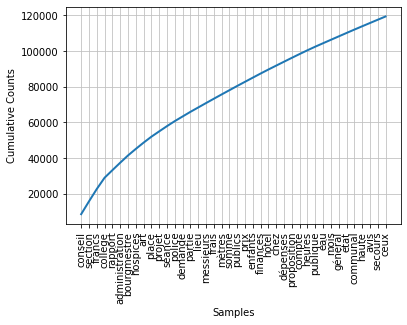

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [310]:
# Plot: les n mots les plus fréquents
n = 40
fdist.plot(n, cumulative=True)

## Les 40 mots les plus fréquents de la décennie 1860

In [290]:
# Récupération du contenu du fichier
path = "../data/tmp_tp4/1860s.txt"

with open(path) as f:
    text = f.read()

In [ ]:
# Tokenization
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

In [201]:
words[:10]

['—', 'VILLE', '31', ')', '0', 'DE', '—', 'BRUXELLES', '.', 'BULLETIN']

In [180]:
# Fichier nettoyé
path = "../data/tmp_tp4/1860s_clean.txt"

with open(path) as f:
    text = f.read()

In [181]:
# Tokenization
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

1205145 words found


In [182]:
words[:10]

['bulletin',
 'communal',
 'numéro',
 'samedi',
 'décembre',
 'conseil',
 'communal',
 'séance',
 'décembre',
 'fontainas']

## Calculer la taille du vocabulaire

In [185]:
# Eliminer les stopwords et les termes non alphabétiques
kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")

1205145 words kept (50597 different word forms)


## Récupérer les mots les plus fréquents et en faire un plot

In [186]:
fdist = nltk.FreqDist(kept)
fdist.most_common(40)

[('conseil', 8451),
 ('collège', 7553),
 ('francs', 6830),
 ('section', 6683),
 ('bourgmestre', 6189),
 ('rapport', 4942),
 ('art', 4916),
 ('administration', 4809),
 ('prix', 2853),
 ('hospices', 2764),
 ('demande', 2731),
 ('partie', 2718),
 ('somme', 2698),
 ('séance', 2683),
 ('lieu', 2674),
 ('place', 2671),
 ('messieurs', 2621),
 ('projet', 2615),
 ('question', 2609),
 ('droit', 2538),
 ('police', 2533),
 ('publics', 2432),
 ('avis', 2431),
 ('communal', 2388),
 ('loi', 2383),
 ('publique', 2381),
 ('cent', 2324),
 ('heures', 2296),
 ('finances', 2205),
 ('hôtel', 2117),
 ('frais', 2114),
 ('proposition', 2100),
 ('terrain', 2094),
 ('article', 2078),
 ('echevin', 2063),
 ('chez', 2000),
 ('saint', 1972),
 ('nom', 1943),
 ('approbation', 1930),
 ('dépenses', 1923)]

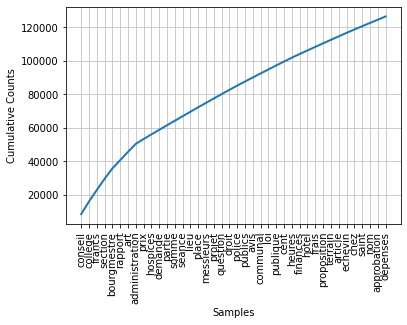

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [187]:
# Plot: les n mots les plus fréquents
n = 40
fdist.plot(n, cumulative=True)

In [274]:
# asking for user input
search_word_count = input('Chercher la frequence du mot: ')

# opening text file in read only mode
file = open(path, "r")

# reading data of the file
read_data = file.read()

# converting data in lower case and the counting the occurrence 
word_count = read_data.lower().count(search_word_count)

# printing word and itcv's count
print(f"The word '{search_word_count}' appeared {word_count} times.")


Chercher la frequence du mot:  école


The word 'école' appeared 2394 times.


## Les 40 mots les plus fréquents de la décennie 1870

### Le reste de la recherche utilisera les fichiers déjà nettoyés

In [292]:
# Récupération du contenu du fichier
path = "../data/tmp_tp4/1870s_clean.txt"

with open(path) as f:
    text = f.read()

In [189]:
# Tokenization
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

1187293 words found


In [191]:
words[:40]

['bulletin',
 'communal',
 'lundi',
 'conseil',
 'avril',
 'communal',
 'comité',
 'secret',
 'mars',
 'conseil',
 'nommé',
 'emile',
 'lhoest',
 'sténographe',
 'délégué',
 'echevin',
 'couteaux',
 'représenter',
 'auprès',
 'société',
 'royale',
 'zoologie',
 'nommé',
 'administrateurs',
 'hospices',
 'bienfaisance',
 'charles',
 'thiéfry',
 'jean',
 'bongé',
 'adopté',
 'modifications',
 'proposées',
 'règlement',
 'organique',
 'corps',
 'sapeurs',
 'pompiers',
 'approuvé',
 'principe']

## Calculer la taille du vocabulaire

In [18]:
# Eliminer les stopwords et les termes non alphabétiques
kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")

1228939 words kept (48671 different word forms)


## Récupérer les mots les plus fréquents et en faire un plot

In [192]:
fdist = nltk.FreqDist(kept)
fdist.most_common(40)

[('conseil', 8451),
 ('collège', 7553),
 ('francs', 6830),
 ('section', 6683),
 ('bourgmestre', 6189),
 ('rapport', 4942),
 ('art', 4916),
 ('administration', 4809),
 ('prix', 2853),
 ('hospices', 2764),
 ('demande', 2731),
 ('partie', 2718),
 ('somme', 2698),
 ('séance', 2683),
 ('lieu', 2674),
 ('place', 2671),
 ('messieurs', 2621),
 ('projet', 2615),
 ('question', 2609),
 ('droit', 2538),
 ('police', 2533),
 ('publics', 2432),
 ('avis', 2431),
 ('communal', 2388),
 ('loi', 2383),
 ('publique', 2381),
 ('cent', 2324),
 ('heures', 2296),
 ('finances', 2205),
 ('hôtel', 2117),
 ('frais', 2114),
 ('proposition', 2100),
 ('terrain', 2094),
 ('article', 2078),
 ('echevin', 2063),
 ('chez', 2000),
 ('saint', 1972),
 ('nom', 1943),
 ('approbation', 1930),
 ('dépenses', 1923)]

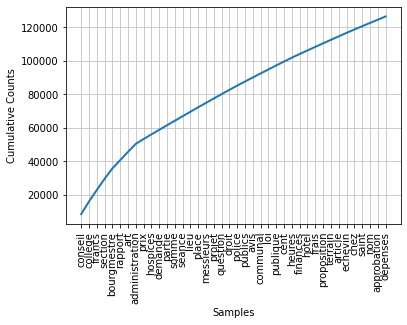

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [193]:
# Plot: les n mots les plus fréquents
n = 40
fdist.plot(n, cumulative=True)

In [287]:
# asking for user input
search_word_count = input('Chercher la frequence du mot: ')

# opening text file in read only mode
file = open(path, "r")

# reading data of the file
read_data = file.read()

# converting data in lower case and the counting the occurrence 
word_count = read_data.lower().count(search_word_count)

# printing word and it's count
print(f"The word '{search_word_count}' appeared {word_count} times.")


Chercher la frequence du mot:  école


The word 'école' appeared 3893 times.


## Les 40 mots les plus fréquents de la décennie 1880

In [298]:
# Récupération du contenu du fichier
path = "../data/tmp_tp4/1880s_clean.txt"

with open(path) as f:
    text = f.read()

In [195]:
# Tokenization
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

2334908 words found


In [196]:
words[:10]

['art',
 'subside',
 'vathénée',
 'royal',
 'francs',
 'somme',
 'représente',
 'part',
 'incombant',
 'traitement']

## Calculer la taille du vocabulaire

In [197]:
# Eliminer les stopwords et les termes non alphabétiques
kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")

2334908 words kept (84157 different word forms)


## Récupérer les mots les plus fréquents et en faire un plot

In [198]:
fdist = nltk.FreqDist(kept)
fdist.most_common(40)

[('francs', 21785),
 ('conseil', 17509),
 ('collège', 13460),
 ('art', 11942),
 ('echevin', 9376),
 ('section', 7791),
 ('messieurs', 7521),
 ('frais', 7379),
 ('question', 7326),
 ('administration', 7316),
 ('rapport', 7235),
 ('bourgmestre', 6920),
 ('demande', 6477),
 ('dépenses', 6425),
 ('budget', 6326),
 ('communal', 6091),
 ('somme', 5738),
 ('prix', 5702),
 ('honorable', 5646),
 ('compte', 5641),
 ('avis', 5581),
 ('proposition', 5483),
 ('hospices', 5428),
 ('finances', 5020),
 ('gaz', 4979),
 ('séance', 4780),
 ('publique', 4657),
 ('lieu', 4581),
 ('droit', 4311),
 ('dépense', 4281),
 ('celte', 4149),
 ('police', 4071),
 ('projet', 4042),
 ('recettes', 4039),
 ('partie', 4035),
 ('entretien', 3826),
 ('richald', 3804),
 ('point', 3788),
 ('société', 3759),
 ('école', 3752)]

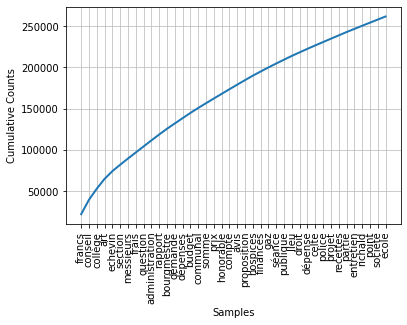

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [199]:
# Plot: les n mots les plus fréquents
n = 40
fdist.plot(n, cumulative=True)

In [299]:
# asking for user input
search_word_count = input('Chercher la frequence du mot: ')

# opening text file in read only mode
file = open(path, "r")

# reading data of the file
read_data = file.read()

# converting data in lower case and the counting the occurrence 
word_count = read_data.lower().count(search_word_count)

# printing word and it's count
print(f"The word '{search_word_count}' appeared {word_count} times.")


Chercher la frequence du mot:  école


The word 'école' appeared 6632 times.


#### Les 40 mots les plus fréquents de la décennie 1890

In [300]:
# Récupération du contenu du fichier
path = "../data/tmp_tp4/1890s_clean.txt"

with open(path) as f:
    text = f.read()

In [201]:
# Tokenization
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

2259861 words found


In [202]:
words[:10]

['jlletin',
 'communal',
 'premiere',
 'partie',
 'tome',
 'compte',
 'rendu',
 'séances',
 'julien',
 'bae']

## Calculer la taille du vocabulaire

In [203]:
# Eliminer les stopwords et les termes non alphabétiques
kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")

2259861 words kept (70680 different word forms)


## Récupérer les mots les plus fréquents et en faire un plot

In [204]:
fdist = nltk.FreqDist(kept)
fdist.most_common(40)

[('francs', 21576),
 ('conseil', 14814),
 ('collège', 12421),
 ('art', 10980),
 ('frais', 8295),
 ('echevin', 7833),
 ('dépenses', 7259),
 ('section', 6976),
 ('messieurs', 6610),
 ('bourgmestre', 6509),
 ('communal', 5965),
 ('budget', 5678),
 ('administration', 5678),
 ('question', 5615),
 ('compte', 5401),
 ('proposition', 5367),
 ('saint', 5254),
 ('hospices', 5244),
 ('rapport', 5217),
 ('avis', 5196),
 ('demande', 5187),
 ('recettes', 4999),
 ('entretien', 4941),
 ('prix', 4683),
 ('honorable', 4419),
 ('ouvriers', 4381),
 ('etc', 4355),
 ('école', 4284),
 ('place', 4225),
 ('somme', 4191),
 ('publique', 3980),
 ('enfants', 3947),
 ('société', 3846),
 ('heures', 3830),
 ('travail', 3823),
 ('droit', 3758),
 ('cours', 3742),
 ('séance', 3741),
 ('partie', 3730),
 ('mot', 3687)]

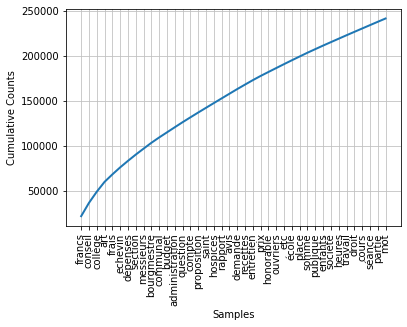

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [205]:
# Plot: les n mots les plus fréquents
n = 40
fdist.plot(n, cumulative=True)

In [301]:
# asking for user input
search_word_count = input('Chercher la frequence du mot: ')

# opening text file in read only mode
file = open(path, "r")

# reading data of the file
read_data = file.read()

# converting data in lower case and the counting the occurrence 
word_count = read_data.lower().count(search_word_count)

# printing word and it's count
print(f"The word '{search_word_count}' appeared {word_count} times.")


Chercher la frequence du mot:  école


The word 'école' appeared 6935 times.


## Les 40 mots les plus fréquents de la décennie 1900

In [303]:
# Récupération du contenu du fichier
path = "../data/tmp_tp4/1900s_clean.txt"

with open(path) as f:
    text = f.read()

In [207]:
# Tokenization
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

2021006 words found


In [208]:
words[:10]

['produit',
 'droit',
 'fréquent',
 'publics',
 'nombf',
 'redevances',
 'montant',
 'porteurs',
 'dépêches',
 'délégués']

## Calculer la taille du vocabulaire

In [209]:
# Eliminer les stopwords et les termes non alphabétiques
kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")

2021006 words kept (80922 different word forms)


## Récupérer les mots les plus fréquents et en faire un plot

In [212]:
fdist = nltk.FreqDist(kept)
fdist.most_common(40)

[('francs', 21410),
 ('collège', 11043),
 ('conseil', 10818),
 ('art', 9336),
 ('frais', 8071),
 ('dépenses', 7080),
 ('bourgmestre', 6897),
 ('recettes', 5930),
 ('budget', 5850),
 ('heures', 5697),
 ('école', 5492),
 ('messieurs', 5362),
 ('communal', 5340),
 ('cours', 5335),
 ('section', 5282),
 ('etc', 5275),
 ('entretien', 5251),
 ('compte', 5199),
 ('avis', 5140),
 ('saint', 4922),
 ('place', 4703),
 ('prix', 4645),
 ('administration', 4440),
 ('hospices', 4399),
 ('echevin', 4381),
 ('ans', 4213),
 ('somme', 3989),
 ('enfants', 3917),
 ('décembre', 3883),
 ('société', 3850),
 ('publique', 3753),
 ('demande', 3721),
 ('personnel', 3692),
 ('ouvriers', 3638),
 ('église', 3549),
 ('traitement', 3384),
 ('exercice', 3356),
 ('rapport', 3328),
 ('lieu', 3312),
 ('question', 3301)]

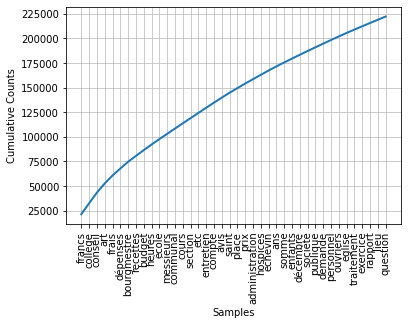

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [213]:
# Plot: les n mots les plus fréquents
n = 40
fdist.plot(n, cumulative=True)

In [304]:
# asking for user input
search_word_count = input('Chercher la frequence du mot: ')

# opening text file in read only mode
file = open(path, "r")

# reading data of the file
read_data = file.read()

# converting data in lower case and the counting the occurrence 
word_count = read_data.lower().count(search_word_count)

# printing word and it's count
print(f"The word '{search_word_count}' appeared {word_count} times.")


Chercher la frequence du mot:  école


The word 'école' appeared 8497 times.


## Les 40 mots les plus fréquents de la décennie 1910

In [306]:
# Récupération du contenu du fichier
path = "../data/tmp_tp4/1910s_clean.txt"

with open(path) as f:
    text = f.read()

In [215]:
# Tokenization
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

1529058 words found


In [216]:
words[:10]

['janvier',
 'comptes',
 'soldent',
 'déficit',
 'alors',
 'somme',
 'prévue',
 'iget',
 'différence',
 'vue']

## Calculer la taille du vocabulaire

In [217]:
# Eliminer les stopwords et les termes non alphabétiques
kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")

1529058 words kept (71186 different word forms)


## Récupérer les mots les plus fréquents et en faire un plot

In [218]:
fdist = nltk.FreqDist(kept)
fdist.most_common(40)

[('francs', 14624),
 ('conseil', 8336),
 ('collège', 7318),
 ('frais', 5889),
 ('bourgmestre', 5248),
 ('cours', 5196),
 ('dépenses', 5061),
 ('communal', 4753),
 ('art', 4521),
 ('recettes', 4093),
 ('hospices', 4009),
 ('budget', 3992),
 ('école', 3952),
 ('entretien', 3852),
 ('heures', 3740),
 ('echevin', 3679),
 ('place', 3675),
 ('administration', 3664),
 ('messieurs', 3658),
 ('avis', 3641),
 ('question', 3528),
 ('compte', 3494),
 ('saint', 3446),
 ('etc', 3408),
 ('ans', 3357),
 ('personnel', 3299),
 ('écoles', 3249),
 ('section', 3230),
 ('enfants', 3182),
 ('société', 3065),
 ('article', 2950),
 ('demande', 2899),
 ('prix', 2773),
 ('police', 2665),
 ('divers', 2640),
 ('ecole', 2625),
 ('subside', 2603),
 ('publique', 2596),
 ('décembre', 2536),
 ('somme', 2503)]

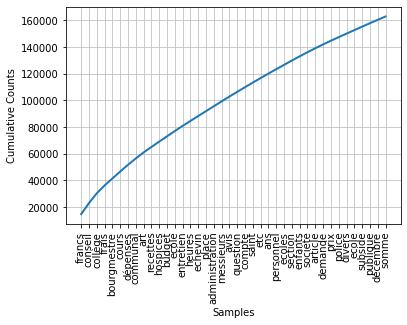

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [219]:
# Plot: les n mots les plus fréquents
n = 40
fdist.plot(n, cumulative=True)

In [307]:
# asking for user input
search_word_count = input('Chercher la frequence du mot: ')

# opening text file in read only mode
file = open(path, "r")

# reading data of the file
read_data = file.read()

# converting data in lower case and the counting the occurrence 
word_count = read_data.lower().count(search_word_count)

# printing word and it's count
print(f"The word '{search_word_count}' appeared {word_count} times.")


Chercher la frequence du mot:  école


The word 'école' appeared 7296 times.


## Les 40 mots les plus fréquents de la décennie 1920

In [313]:
# Récupération du contenu du fichier
path = "../data/tmp_tp4/1920s_clean.txt"

with open(path) as f:
    text = f.read()

In [221]:
# Tokenization
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

1149550 words found


In [222]:
words[:10]

['bulletin',
 'tombola',
 'hospice',
 'entrées',
 'lay',
 'tixidenji',
 'usé',
 'bulletin',
 'communal',
 'numéro']

## Calculer la taille du vocabulaire

In [223]:
# Eliminer les stopwords et les termes non alphabétiques
kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")

1149550 words kept (61127 different word forms)


## Récupérer les mots les plus fréquents et en faire un plot

In [224]:
fdist = nltk.FreqDist(kept)
fdist.most_common(40)

[('conseil', 8484),
 ('section', 7174),
 ('francs', 6949),
 ('collège', 6325),
 ('rapport', 4241),
 ('administration', 4186),
 ('bourgmestre', 4078),
 ('hospices', 3673),
 ('art', 3528),
 ('place', 3337),
 ('projet', 2986),
 ('séance', 2952),
 ('police', 2811),
 ('demande', 2604),
 ('partie', 2593),
 ('lieu', 2464),
 ('messieurs', 2461),
 ('frais', 2431),
 ('mètres', 2416),
 ('somme', 2387),
 ('publics', 2386),
 ('prix', 2334),
 ('enfants', 2329),
 ('finances', 2314),
 ('hôtel', 2257),
 ('chez', 2191),
 ('dépenses', 2186),
 ('proposition', 2174),
 ('compte', 2141),
 ('heures', 2100),
 ('publique', 2019),
 ('eau', 1927),
 ('mois', 1921),
 ('général', 1914),
 ('état', 1910),
 ('communal', 1893),
 ('haute', 1859),
 ('avis', 1844),
 ('secours', 1841),
 ('ceux', 1821)]

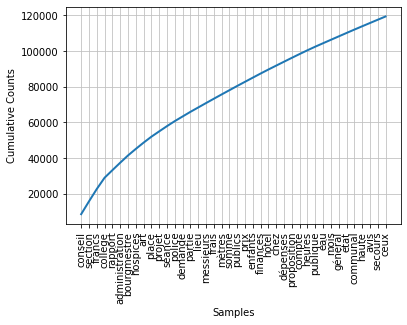

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [225]:
# Plot: les n mots les plus fréquents
n = 40
fdist.plot(n, cumulative=True)

In [314]:
# asking for user input
search_word_count = input('Chercher la frequence du mot: ')

# opening text file in read only mode
file = open(path, "r")

# reading data of the file
read_data = file.read()

# converting data in lower case and the counting the occurrence 
word_count = read_data.lower().count(search_word_count)

# printing word and it's count
print(f"The word '{search_word_count}' appeared {word_count} times.")


Chercher la frequence du mot:  école


The word 'école' appeared 1405 times.


## Les 40 mots les plus fréquents de la décennie 1930

In [315]:
# Récupération du contenu du fichier
path = "../data/tmp_tp4/1930s_clean.txt"

with open(path) as f:
    text = f.read()

In [227]:
# Tokenization
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

1840385 words found


In [228]:
words[:10]

['feux',
 'postes',
 'arrivés',
 'catégories',
 'étages',
 'premiers',
 'litages',
 'lieux',
 'postes',
 'groupé']

## Calculer la taille du vocabulaire

In [229]:
# Eliminer les stopwords et les termes non alphabétiques
kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")

1840385 words kept (73792 different word forms)


## Récupérer les mots les plus fréquents et en faire un plot

In [230]:
fdist = nltk.FreqDist(kept)
fdist.most_common(20)

[('francs', 13416),
 ('frais', 7143),
 ('conseil', 6844),
 ('publique', 6793),
 ('collège', 6497),
 ('communal', 6296),
 ('budget', 6223),
 ('recettes', 6103),
 ('bourgmestre', 5622),
 ('echevin', 5596),
 ('entretien', 5591),
 ('art', 5212),
 ('personnel', 5156),
 ('cours', 4982),
 ('ecole', 4934),
 ('dépenses', 4918),
 ('enfants', 4653),
 ('membres', 4501),
 ('compte', 4435),
 ('article', 4387)]

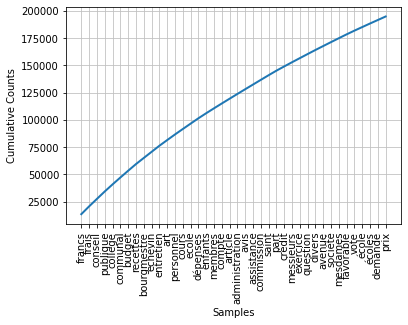

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [231]:
# Plot: les n mots les plus fréquents
n = 40
fdist.plot(n, cumulative=True)

In [316]:
# asking for user input
search_word_count = input('Chercher la frequence du mot: ')

# opening text file in read only mode
file = open(path, "r")

# reading data of the file
read_data = file.read()

# converting data in lower case and the counting the occurrence 
word_count = read_data.lower().count(search_word_count)

# printing word and it's count
print(f"The word '{search_word_count}' appeared {word_count} times.")


Chercher la frequence du mot:  école


The word 'école' appeared 6589 times.


## Les 40 mots les plus fréquents de la décennie 1940

In [317]:
# Récupération du contenu du fichier
path = "../data/tmp_tp4/1940s_clean.txt"

with open(path) as f:
    text = f.read()

In [233]:
# Tokenization
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

868568 words found


In [234]:
words[:10]

['novembre',
 'sapeurs',
 'pompiers',
 'convention',
 'commune',
 'waterloo',
 'secours',
 'cas',
 'accidents',
 'incendie']

## Calculer la taille du vocabulaire

In [235]:
# Eliminer les stopwords et les termes non alphabétiques
kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")

868568 words kept (48809 different word forms)


## Récupérer les mots les plus fréquents et en faire un plot

In [236]:
fdist = nltk.FreqDist(kept)
fdist.most_common(30)

[('conseil', 4691),
 ('publique', 4686),
 ('communal', 4079),
 ('francs', 3891),
 ('collège', 3539),
 ('personnel', 3171),
 ('bourgmestre', 3104),
 ('ecole', 3025),
 ('taxe', 3023),
 ('budget', 3016),
 ('cours', 2702),
 ('octobre', 2647),
 ('echevin', 2591),
 ('assistance', 2585),
 ('commission', 2565),
 ('membres', 2426),
 ('art', 2293),
 ('question', 2284),
 ('article', 2281),
 ('avis', 2096),
 ('compte', 1947),
 ('messieurs', 1923),
 ('police', 1906),
 ('administration', 1805),
 ('mesdames', 1791),
 ('nomination', 1766),
 ('demande', 1759),
 ('part', 1753),
 ('favorable', 1739),
 ('professeur', 1686)]

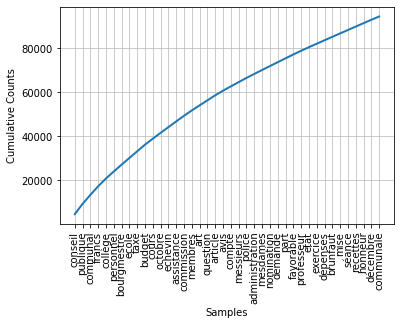

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [237]:
# Plot: les n mots les plus fréquents
n = 40
fdist.plot(n, cumulative=True)

In [318]:
# asking for user input
search_word_count = input('Chercher la frequence du mot: ')

# opening text file in read only mode
file = open(path, "r")

# reading data of the file
read_data = file.read()

# converting data in lower case and the counting the occurrence 
word_count = read_data.lower().count(search_word_count)

# printing word and it's count
print(f"The word '{search_word_count}' appeared {word_count} times.")


Chercher la frequence du mot:  école


The word 'école' appeared 2178 times.


## Les 40 mots les plus fréquents de la décennie 1950

In [319]:
# Récupération du contenu du fichier
path = "../data/tmp_tp4/1950s_clean.txt"

with open(path) as f:
    text = f.read()

In [239]:
# Tokenization
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

2719076 words found


In [240]:
words[:10]

['octobre',
 'report',
 'direction',
 'administration',
 'traitements',
 'salaires',
 'entretien',
 'frais',
 'généraux',
 'amortissements']

## Calculer la taille du vocabulaire

In [241]:
# Eliminer les stopwords et les termes non alphabétiques
kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")

2719076 words kept (89233 different word forms)


## Récupérer les mots les plus fréquents et en faire un plot

In [242]:
fdist = nltk.FreqDist(kept)
fdist.most_common(30)

[('francs', 18805),
 ('publique', 13599),
 ('conseil', 11381),
 ('communal', 10727),
 ('bourgmestre', 10429),
 ('budget', 9775),
 ('collège', 9544),
 ('cours', 8908),
 ('question', 8730),
 ('octobre', 8676),
 ('ecole', 8287),
 ('intervention', 8249),
 ('commission', 8122),
 ('personnel', 7979),
 ('article', 7767),
 ('assistance', 7328),
 ('art', 7152),
 ('part', 6686),
 ('membres', 6587),
 ('echevin', 6146),
 ('compte', 6081),
 ('avis', 5988),
 ('mesdames', 5767),
 ('taxe', 5660),
 ('messieurs', 5637),
 ('décembre', 5589),
 ('dépense', 5378),
 ('section', 5220),
 ('demande', 5087),
 ('considérant', 4929)]

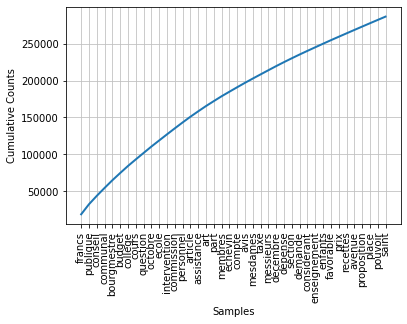

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [243]:
# Plot: les n mots les plus fréquents
n = 40
fdist.plot(n, cumulative=True)

In [320]:
# asking for user input
search_word_count = input('Chercher la frequence du mot: ')

# opening text file in read only mode
file = open(path, "r")

# reading data of the file
read_data = file.read()

# converting data in lower case and the counting the occurrence 
word_count = read_data.lower().count(search_word_count)

# printing word and it's count
print(f"The word '{search_word_count}' appeared {word_count} times.")


Chercher la frequence du mot:  école


The word 'école' appeared 7217 times.


## Les 40 mots les plus fréquents de la décennie 1960

In [321]:
# Récupération du contenu du fichier
path = "../data/tmp_tp4/1960s_clean.txt"

with open(path) as f:
    text = f.read()

In [245]:
# Tokenization
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

3780960 words found


In [246]:
words[:10]

['administration',
 'procédé',
 'pièces',
 'inscription',
 'procédé',
 'adjudications',
 'publiques',
 'adjudications',
 'restreintes',
 'demandes']

## Calculer la taille du vocabulaire

In [247]:
# Eliminer les stopwords et les termes non alphabétiques
kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")

3780960 words kept (104631 different word forms)


## Récupérer les mots les plus fréquents et en faire un plot

In [248]:
fdist = nltk.FreqDist(kept)
fdist.most_common(15)

[('francs', 24736),
 ('publique', 15980),
 ('budget', 15863),
 ('conseil', 14697),
 ('communal', 13301),
 ('article', 12756),
 ('collège', 12367),
 ('art', 11854),
 ('bourgmestre', 11772),
 ('compte', 10339),
 ('question', 9983),
 ('assistance', 9608),
 ('part', 9592),
 ('commission', 9415),
 ('echevin', 8969)]

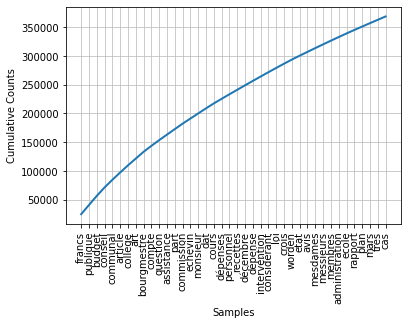

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [249]:
# Plot: les n mots les plus fréquents
n = 40
fdist.plot(n, cumulative=True)

In [322]:
# asking for user input
search_word_count = input('Chercher la frequence du mot: ')

# opening text file in read only mode
file = open(path, "r")

# reading data of the file
read_data = file.read()

# converting data in lower case and the counting the occurrence 
word_count = read_data.lower().count(search_word_count)

# printing word and it's count
print(f"The word '{search_word_count}' appeared {word_count} times.")


Chercher la frequence du mot:  école


The word 'école' appeared 3975 times.


## Les 40 mots les plus fréquents de la décennie 1970

In [323]:
# Récupération du contenu du fichier
path = "../data/tmp_tp4/1970s_clean.txt"

with open(path) as f:
    text = f.read()

In [251]:
# Tokenization
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

3479758 words found


In [252]:
words[:10]

['evaluation',
 'budget',
 'apports',
 'ventes',
 'taxe',
 'fiscale',
 'droits',
 'irrécouvrables',
 'droits',
 'constatés']

## Calculer la taille du vocabulaire

In [253]:
# Eliminer les stopwords et les termes non alphabétiques
kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")

3479758 words kept (102640 different word forms)


## Récupérer les mots les plus fréquents et en faire un plot

In [254]:
fdist = nltk.FreqDist(kept)
fdist.most_common(30)

[('conseil', 19086),
 ('bourgmestre', 14608),
 ('collège', 14438),
 ('article', 12294),
 ('echevin', 12166),
 ('communal', 11543),
 ('budget', 11445),
 ('publique', 10323),
 ('worden', 10040),
 ('dat', 9988),
 ('dépense', 9966),
 ('question', 9374),
 ('francs', 9372),
 ('art', 9346),
 ('monsieur', 8702),
 ('deze', 8234),
 ('compte', 7961),
 ('zijn', 7826),
 ('heer', 7707),
 ('dépenses', 7234),
 ('tôt', 6999),
 ('part', 6587),
 ('membres', 6510),
 ('heren', 6288),
 ('approbation', 6123),
 ('over', 5947),
 ('intervention', 5690),
 ('très', 5679),
 ('plan', 5661),
 ('commission', 5659)]

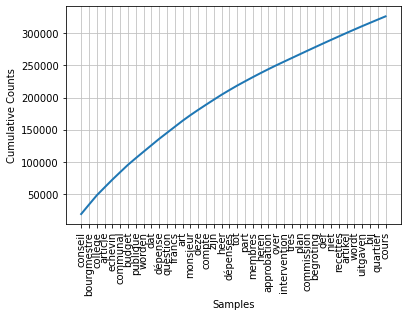

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [255]:
# Plot: les n mots les plus fréquents
n = 40
fdist.plot(n, cumulative=True)

In [324]:
# asking for user input
search_word_count = input('Chercher la frequence du mot: ')

# opening text file in read only mode
file = open(path, "r")

# reading data of the file
read_data = file.read()

# converting data in lower case and the counting the occurrence 
word_count = read_data.lower().count(search_word_count)

# printing word and it's count
print(f"The word '{search_word_count}' appeared {word_count} times.")


Chercher la frequence du mot:  école


The word 'école' appeared 3347 times.


# Graphique final comprenant le résultat de fréquence du terme `école` dans le corpus par décennie

## Graphique 1

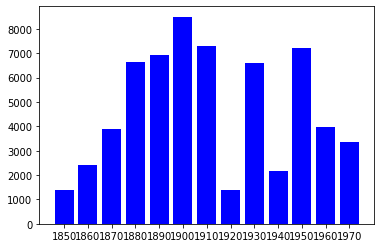

In [325]:
import matplotlib.pyplot as plt

def bar_chart(numbers, labels, pos):
    plt.bar(pos, numbers, color='blue')
    plt.xticks(ticks=pos, labels=labels)
    plt.show()

if __name__ == '__main__':
    numbers = [1405, 2394, 3893, 6632, 6935, 8497, 7296, 1405, 6589, 2178, 7217, 3975, 3347]
    labels = ['1850', '1860', '1870', '1880', '1890', '1900', '1910', '1920', '1930', '1940', '1950', '1960', '1970']
    pos = list(range(13))
    bar_chart(numbers, labels, pos)

## Graphique 2

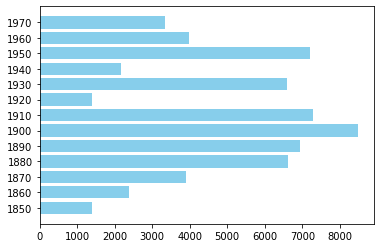

In [326]:
import matplotlib.pyplot as plt
def bar_charth(numbers, labels, pos):
    plt.barh(pos, numbers, color='skyblue')
    plt.yticks(ticks=pos, labels=labels)
    plt.show()
if __name__ == '__main__':
    numbers = [1405, 2394, 3893, 6632, 6935, 8497, 7296, 1405, 6589, 2178, 7217, 3975, 3347]
    labels = ['1850', '1860', '1870', '1880', '1890', '1900', '1910', '1920', '1930', '1940', '1950', '1960', '1970']
    pos = list(range(13))
    bar_charth(numbers, labels, pos)

# Les années 1900 et 1910 comprennent le résultat de fréquence du terme `école` le plus élevé, ils seront donc comparés